<a href="https://colab.research.google.com/github/eugeinga/CODER-DataScienceIII/blob/main/proyecto_final_ingaramo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE III: NLP, Deep learning y Redes Neuronales Básicas**


![Portada](https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-BannerCODER.jpg)

* **Comisión:** 74560
* **Profesor:** Ezequiel Juan Bassano
* **Tutor:** Federico Gravina
* **Estudiante:** [Eugenia Ingaramo](https://www.linkedin.com/in/eugeniaingaramo/)

# **PROYECTO FINAL: Análisis de reseñas sobre tiendas online de ropa para mujer**

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>0 - CONTENIDO DEL PROYECTO </b></div>

<div class="toc">
  <ul>
    <li>1 - INTRODUCCIÓN</li>
    <li>2 - OBJETIVOS e HIPÓTESIS</li>
    <li>3 - EL SET DE DATOS</li>
    <li>4 - PRE-PROCESAMIENTO DE DATOS
    <ul>
      <li>Carga de Datos</li>
      <li>Data Wrangling
        <ul>
          <li>Detección y Remoción de Valores Duplicados</li>
          <li>Imputación de Valores Faltantes</li>
          <li>Detección y Manejo de Valores Sospechosos</li>
        </ul>
      </li>
    </ul>
    </li>
    <li>5 - ANÁLISIS EXPLORATORIO DE DATOS (EDA)
      <ul>
        <li>Análisis Univariado</li>
          <ul>
            <li>Análisis Estadístico</li>
            <li>Análisis de Distribución de los datos</li>
            <li>Detección y Manejo de Outliers</li>
          </ul>
        <li>Análisis Bivariado</li>
          <ul>
            <li>Análisis de Correlación y Dependencia entre Variables</li>
          </ul>
        <li>Análisis Multivariado</li>
          <ul>
            <li>Análisis de Multicolinealidad</li>
          </ul>
      </ul>          
    <li>6 - FEATURE ENGINEERING
      <ul>
        <li>Feature Creation - Generación de Variables</li>
        <li>Feature Binning - Agrupación de Características</li>
        <li>Transformación de Datos (Normalización) 🔴</li>
        <li>Escalado (Estandarización de los Datos) 🟡</li>  
      </ul>
    <li>CONCLUSIÓN</li>
    <li>REFERENCIAS</li>
  </ul>
</div>


<a id="1" href="#introduccion"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>1 - INTRODUCCION </b></div>

![Datset Cover](https://github.com/eugeinga/CODER-DataScienceIII/raw/main/IMG-Indumentaria.jpg)

En el competitivo mundo del e-commerce de indumentaria femenina, entender las opiniones de las clientas es clave para mejorar la experiencia de compra, optimizar el catálogo de productos y aumentar la fidelización. Sin embargo, las reseñas suelen estar en formato texto no estructurado, lo que dificulta su análisis masivo.
Este proyecto busca transformar estas reseñas en información valiosa, identificando patrones de satisfacción e insatisfacción y construyendo un modelo que permita clasificar automáticamente las opiniones como positivas o negativas.

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>2 - OBJETIVO e HIPÓTESIS </b></div>

El presente trabajo tiene por objeto analizar y modelar reseñas de indumentaria femenina para:

* Aplicar técnicas de Procesamiento de Lenguaje Natural (NLP) que permitan extraer insights relevantes.

* Desarrollar un modelo de clasificación supervisado que prediga la polaridad de una reseña (positiva/negativa) a partir de su texto.

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>3 - EL SET DE DATOS </b></div>

### **◼️ ORIGEN DE LOS DATOS**
----

**Women’s Clothing E-Commerce Reviews**, disponible públicamente en Kaggle:
<https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews>

Este es un conjunto de datos de comercio electrónico de ropa femenina que gira en torno a las reseñas escritas por los clientes.

### **◼️ VARIABLES**
----
Este conjunto de datos incluye 23.486 filas y 10 variables de características. Cada fila corresponde a una reseña de un cliente e incluye las siguientes variables:

* **ID de la prenda:** variable categórica entera que hace referencia a la prenda específica que se reseña.
* **Edad:** variable entera positiva que indica la edad del reseñador.
* **Título:** Variable de cadena para el título de la reseña.
* **Texto de la reseña:** Variable de cadena para el cuerpo de la reseña.
* **Calificación:** Variable entera ordinal positiva para la puntuación del producto otorgada por el cliente, desde 1 (peor) hasta 5 (mejor).
* **IND recomendado:** Variable binaria que indica si el cliente recomienda el producto, donde 1 significa recomendado y 0 no recomendado.
* **Recuento de comentarios positivos:** Número entero positivo que documenta el número de otros clientes que consideraron positiva esta reseña.
* **Nombre de la división:** Nombre categórico de la división de alto nivel del producto.
* **Nombre del departamento:** Nombre categórico del departamento del producto.
* **Nombre de la clase:** Nombre categórico de la clase del producto.


Para la clasificación se crea una variable binaria objetivo "Sentiment":
* 1 (Positivo) = Rating 4 o 5.
* 0 (Negativo) = Rating 1 o 2.

Se excluirán las reseñas con rating 3 (neutral).

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>4 - PRE-PROCESAMIENTO DE DATOS </b></div>

### **◼️ LIBRERÍAS A UTILIZAR**
----

In [2]:
import pandas as pd                                 # manejo de datos
#import numpy as np                                  # manejo de arreglos
#import seaborn as sns                               # visualización de gráficos
#from seaborn import lmplot
#import matplotlib.pyplot as plt                     # visualización de gráficos
##import matplotlib.style as style
#import missingno as msno                            # visualización de datos faltantes
#from sklearn.preprocessing import LabelEncoder      # conversión de variables categóricas
#from sklearn.preprocessing import StandardScaler    # escalado de datos
#from sklearn.preprocessing import RobustScaler      # escalado de datos
#import scipy.stats as stats                         # análisis estadístico
#from scipy.stats import shapiro                     # Test estadístico de Normalidad
#import statsmodels.api as sm                        # Gráfico QQ-Plot
#from statsmodels.regression.linear_model import OLS # para análisis de multicolinealidad (VIF)
#from statsmodels.tools.tools import add_constant    # para análisis de multicolinealidad (VIF)

# Librerías de modelado de datos
#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor  # Random Forest
#from sklearn.linear_model import LogisticRegression # Regresión Logística
#from sklearn.svm import SVC                         # Support Vector Machine (SVM) para Clasificación
#from sklearn.neighbors import KNeighborsRegressor   # K-Nearest Neighbor (KNN)
#from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
#from sklearn.inspection import permutation_importance

#import statsmodels.api as sm
#from statsmodels.miscmodels.ordinal_model import OrderedModel # Regresión Logística Ordinal

#warnings.filterwarnings("ignore")

#sns.set_theme(style="whitegrid", palette="pastel") # Estilo de seaborn
#custom_palette = {
#    0: '#ffb482',  # Tipo de vino: RED (type=0) Color Naranja
#    1: '#a1c9f4',  # Tipo de vino: WHITE (type=1) Color Azul
#    'red': '#ffb482',  # Tipo de vino: RED (type=0) Color Naranja
#    'white': '#a1c9f4'  # Tipo de vino: WHITE (type=1) Color Azul
#}

#sns.color_palette("pastel")
#sns.color_palette("pastel").as_hex()
#sns.color_palette(palette='pastel', as_cmap=True)

### **◼️ CARGA DE DATOS**
----

In [3]:
# Lectura del dataset

url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceIII/refs/heads/main/Womens%20Clothing%20E-Commerce%20Reviews.csv"
df=pd.read_csv(url,sep=',',header=0)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### **◼️ DATA WRANGLING**
---




El **Data Wrangling** consiste en limpiar, transformar y estructurar los datos para que sean más utilizables y valiosos. Este proceso es esencial porque los datos en su forma original a menudo están desordenados, incompletos o contienen errores que pueden afectar la calidad del análisis.

Como parte de esta etapa se procederá a:
- Identificar valores duplicados
- Identificar valores faltantes
- Formatear de datos
- Transformar datos (normalización, estandarización, etc.).

En este caso se trabaja con un único dataset por lo que no será necesario combinar/concatenar ficheros.

In [4]:
# Información de resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


El dataset bajo estudio cuenta con 23486 filas y 10 columnas de las cuales 9 corresponden a variables independientes a analizar y 1 a la variable dependiente u objetivo.

In [6]:
# Cardinalidad de las variables

cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)}).round(2)
cardinalidad

,Cantidad,Porcentaje
Unnamed: 0,23486,100.00
Clothing ID,1206,5.13
Age,77,0.33
Title,13993,59.58
Review Text,22634,96.37
Rating,5,0.02
Recommended IND,2,0.01
Positive Feedback Count,82,0.35
Division Name,3,0.01
Department Name,6,0.03


#### **◾ DETECCIÓN Y REMOCIÓN DE VALORES DUPLICADOS**

##### Se identifican y evalúa la remoción de los registros duplicados

In [7]:
print("Dimensiones del dataset original: ", df.shape)
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
print("Dimensiones del dataset sin filas duplicadas: ", df.shape)

Dimensiones del dataset original:  (23486, 11)
Dimensiones del dataset sin filas duplicadas:  (23486, 11)


El dataset no tiene registros duplicadas que eliminar.

#### **◾ VALORES FALTANTES**

Se identifican los valores nulos en cada una de las columnas del dataset.

In [8]:
# Contabilizo los datos nulos/faltantes por columna.

pd.DataFrame({'Cant.NAN' : df.isna().sum(), '%NAN' : df.isna().sum() / len(df) * (100)}).round(2)

,Cant.NAN,%NAN
Unnamed: 0,0,0.00
Clothing ID,0,0.00
Age,0,0.00
Title,3810,16.22
Review Text,845,3.60
Rating,0,0.00
Recommended IND,0,0.00
Positive Feedback Count,0,0.00
Division Name,14,0.06
Department Name,14,0.06


<Axes: >

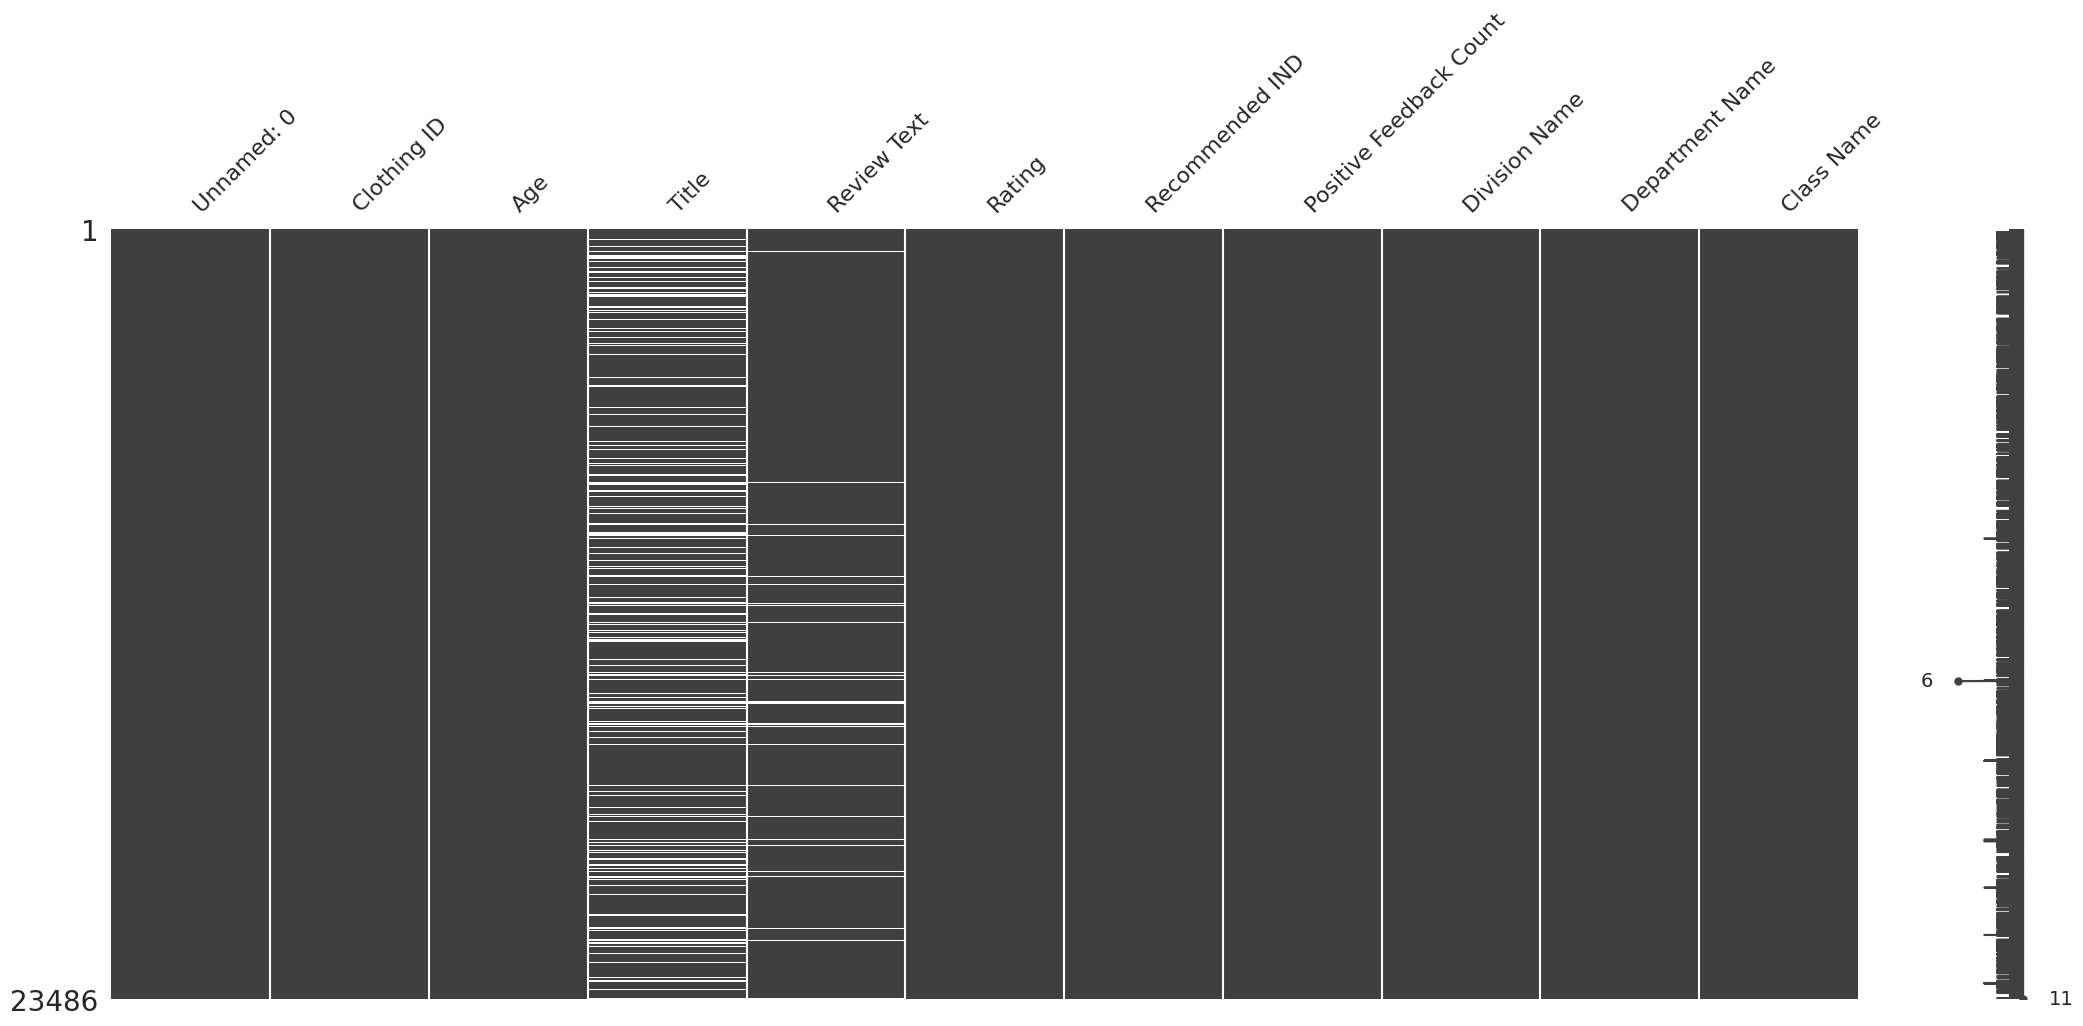

In [9]:
msno.matrix(df)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### **◾ DETECCIÓN Y MANEJO DE VALORES SOSPECHOSOS**

---



##### Se consideran valores sospechosos los siguientes:
* los valores en cero (a excepción de 'ácido cítrico'),
* los valores negativos (aunque según los datos estadísticos no hay columnas con valores mínimos negativos).

In [ ]:
# Se contabilizan los datos que son menores o igual a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

valoresnulos = (df[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] <= 0).sum()
print(valoresnulos)

fixed acidity           0
volatile acidity        0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


No hay datos nulos o menores a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

In [ ]:
df.nunique()

,0
type,2
fixed acidity,111
volatile acidity,187
citric acid,89
residual sugar,318
chlorides,214
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,108


<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>5 - ANÁLISIS EXPLORATORIO DE DATOS </b></div>

Mediante en **Análisis Exploratorio de Datos** se pretende explorar y comprender los datos en detalle a fin de que cualquier análisis posterior sea válido y significativo.

Como parte de esta etapa se procederá a:
- Identificar patrones y tendencias.
- Detectar valores atípicos o anomalías.
- Comprender las relaciones entre diferentes variables.
- Preparar los datos para su transformación, asegurando que estén en el formato adecuado para el análisis.

### **◼️ ANÁLISIS UNIVARIADO**
----

#### **◾ ANÁLISIS ESTADÍSTICO**

In [ ]:
# Separo los dataframes por tipo de vino
df_white = df.loc[df['type'] == 'white']
df_red = df.loc[df['type'] == 'red']

In [ ]:
# Estadística Descriptiva VINOS BLANCOS

df_white.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00
mean,6.84,0.28,0.33,5.92,0.05,34.91,137.25,0.99,3.20,0.49,10.59,5.86
std,0.87,0.10,0.12,4.86,0.02,17.22,43.13,0.00,0.15,0.11,1.22,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40,6.00
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [ ]:
# Estadística Descriptiva VINOS TINTOS

df_red.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.15,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.10,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


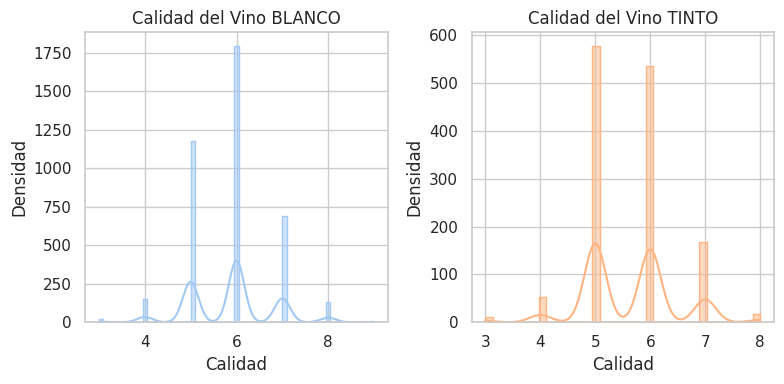

In [ ]:
# Comparo la distribución de las calidades de los vinos por tipo de vino

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df_white, x='quality', kde=True, element="step", color='#a1c9f4', bins=int(np.sqrt(len(df_white['quality']))))
plt.title('Calidad del Vino BLANCO')
plt.xlabel('Calidad')
plt.ylabel('Densidad')

plt.subplot(1, 2, 2)
sns.histplot(data=df_red, x='quality', kde=True, element="step", color='#ffb482', bins=int(np.sqrt(len(df_red['quality']))))
plt.title('Calidad del Vino TINTO')
plt.xlabel('Calidad')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


In [ ]:
'''
# Comparo la distribución de la variable calidad con la gama de vinos.

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='quality', kde=True, color='purple')
plt.title('Calidad de Vinos')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[df['type'] == 0]['gama'], kde=True, color='skyblue')
plt.title('Gama de Vinos')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
'''

"\n# Comparo la distribución de la variable calidad con la gama de vinos.\n\nplt.figure(figsize=(8, 4))\n\nplt.subplot(1, 2, 1)\nsns.histplot(data=df, x='quality', kde=True, color='purple')\nplt.title('Calidad de Vinos')\nplt.xlabel('Calidad')\nplt.ylabel('Frecuencia')\n\nplt.subplot(1, 2, 2)\nsns.histplot(df[df['type'] == 0]['gama'], kde=True, color='skyblue')\nplt.title('Gama de Vinos')\nplt.xlabel('Calidad')\nplt.ylabel('Frecuencia')\n\nplt.tight_layout()\nplt.show()\n"

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

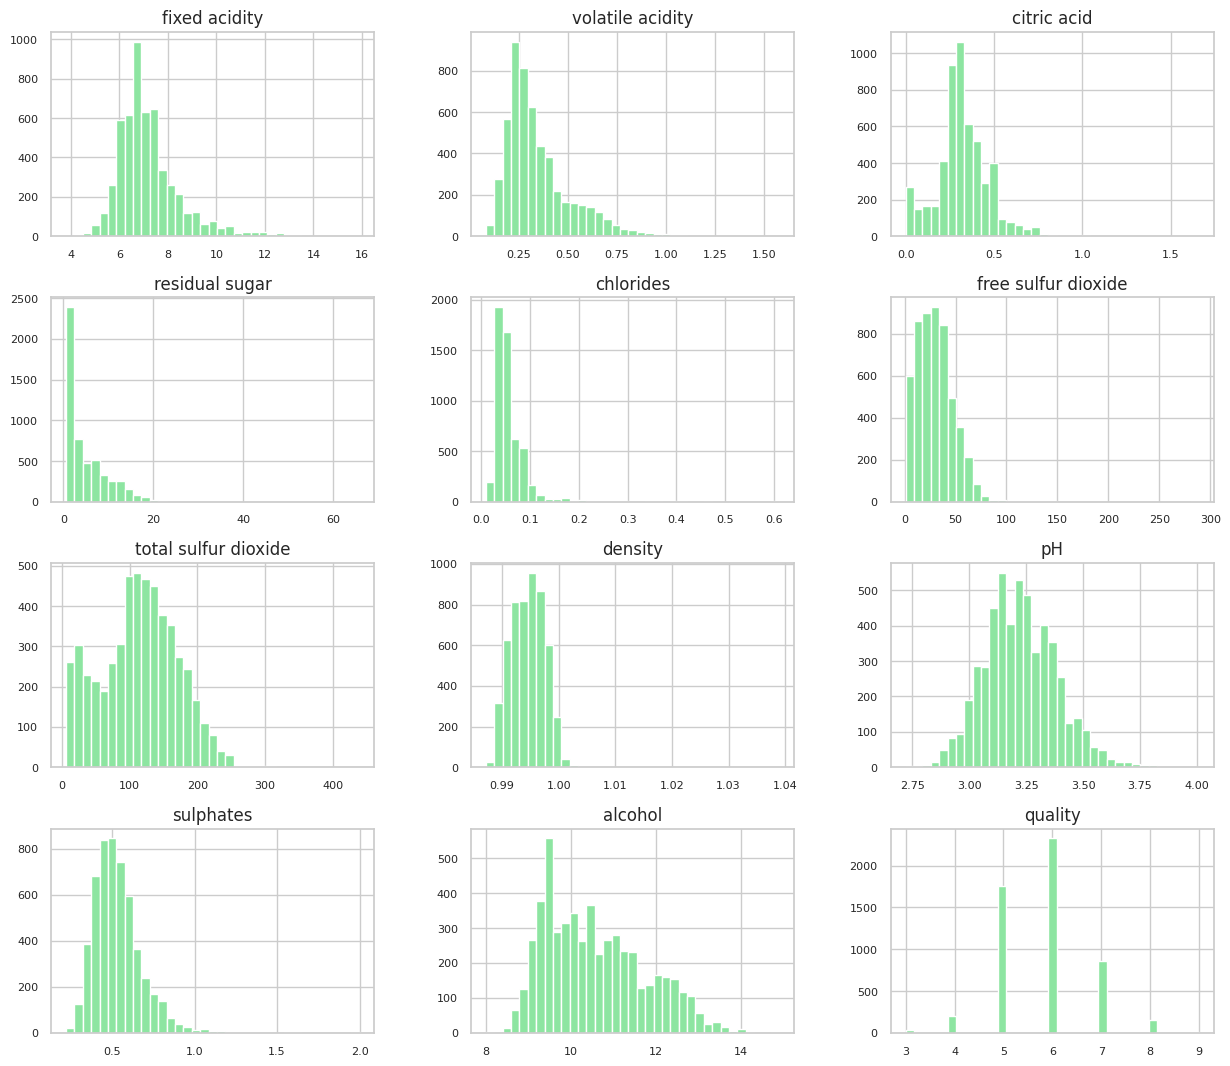

In [ ]:
df.hist(figsize=(15, 13), bins=35, xlabelsize=8, ylabelsize=8, color='#8DE5A1')

Muchas de las variables tienen una distribución asimétrica y/o valores extremos que son analizados en el próximo apartado.

In [ ]:
"""
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')

for _, feature in enumerate(numerical_features):
    fig, ax = plt.subplots(figsize=(10, 2), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=ax) # Se usa histplot con kde=True para incluir la curva de densidad
    #sns.histplot(df[feature], hue=df['type'], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad
    #sns.histplot(df[feature], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad
    #axes[0].grid()
    #axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')\n\nfor _, feature in enumerate(numerical_features):\n    fig, ax = plt.subplots(figsize=(10, 2), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=ax) # Se usa histplot con kde=True para incluir la curva de densidad\n    #sns.histplot(df[feature], hue=df['type'], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad\n    #sns.histplot(df[feature], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad\n    #axes[0].grid()\n    #axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposici

Se calcula el coeficiente de variación (CV) a fin de determinar la dispersión de cada variable respecto a la media, tal que, si el CV es <= 30% se dice que los datos son relativamente homogéneos.

<img src="https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-Coeficiente%20de%20Variacion.jpg" alt="Coeficiente de Variacion" width="400"/>

Este valor permitirá comparar la dispersión entre diferentes conjuntos de datos, independientemente de sus unidades de medida.

In [ ]:
encabezados = df.columns.tolist()
encabezados.remove('type')
#encabezados.remove('gama')
#encabezados.remove('gamaNro')

coefVar = []

for i in encabezados:
    CV_white = df_white[i].std() / df_white[i].mean() * 100
    CV_red = df_red[i].std() / df_red[i].mean() * 100
    coefVar.append([i, CV_white.round(2), CV_red.round(2)])

coefVar_df = pd.DataFrame(coefVar, columns=['Variable', 'CV_Blanco', 'CV_Tinto'])   # Se crea un DataFrame con los resultados

coefVar_df

,Variable,CV_Blanco,CV_Tinto
0,fixed acidity,12.65,20.87
1,volatile acidity,36.88,34.57
2,citric acid,36.60,71.70
3,residual sugar,82.15,53.59
4,chlorides,50.28,56.03
5,free sulfur dioxide,49.32,65.73
6,total sulfur dioxide,31.43,71.35
7,density,0.29,0.19
8,pH,4.74,4.68
9,sulphates,23.16,25.91


💡 INSIGHTS

Los valores >30% indican que los datos son heterogéneos; es decir, la media no es una buena representación para este conjunto.

* En general, los vinos tintos muestran una mayor variabilidad en varias de sus características (como citric acid, free sulfur dioxide, y total sulfur dioxide) en comparación con los vinos blancos.
* Tanto en vinos blancos como tintos, las variables 'density', 'pH', 'alcohol', y 'quality' muestran baja variabilidad, indicando que los valores están bastante concentrados alrededor de la media.
* Las variables 'residual sugar', 'chlorides', 'free sulfur dioxide', y 'total sulfur dioxide' presentan alta variabilidad en ambos tipos de vino, sugiriendo una gran dispersión en los valores.


Si bien el coeficiente de variación es útil para entender la dispersión de los datos, éste no proporciona información sobre la forma de la distribución. Ésta será analizada en un posterior apartado.

#### **◾ ANÁLISIS DE DISTRIBUCIÓN DE LOS DATOS**

Las **Pruebas de Normalidad** son esenciales para validar la aplicabilidad de muchos métodos estadísticos y asegurar la precisión de los resultados obtenidos.

Se trata de herramientas estadísticas utilizadas para determinar si un conjunto de datos sigue una distribución normal. La normalidad es un supuesto clave en muchos análisis estadísticos, ya que permite aplicar técnicas como pruebas de hipótesis, intervalos de confianza y modelos de regresión que dependen de esta distribución. Si los datos no son normales, puede ser necesario utilizar métodos no paramétricos que no requieren este supuesto.



Los **histogramas** son una excelente herramienta visual para evaluar la distribución de un conjunto de datos y determinar si se asemeja a una distribución normal (también conocida como distribución gaussiana).

Luego, para completar el análisis gráfico de normalidad se realiza un test estadístico de **Shapiro-Wilks** y **QQ-Plots**.

In [ ]:
"""
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], ax=axes[0])
    sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\n\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], ax=axes[0])\n    sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad\n    axes[0].grid()\n    axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.\n    plt.show()\n"

In [ ]:
"""
# Se analizan en detalle las distribuciones según el tipo de vino.

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0])
    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\n# Se analizan en detalle las distribuciones según el tipo de vino.\n\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0])\n    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad\n    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])\n    axes[0].grid()\n    axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten

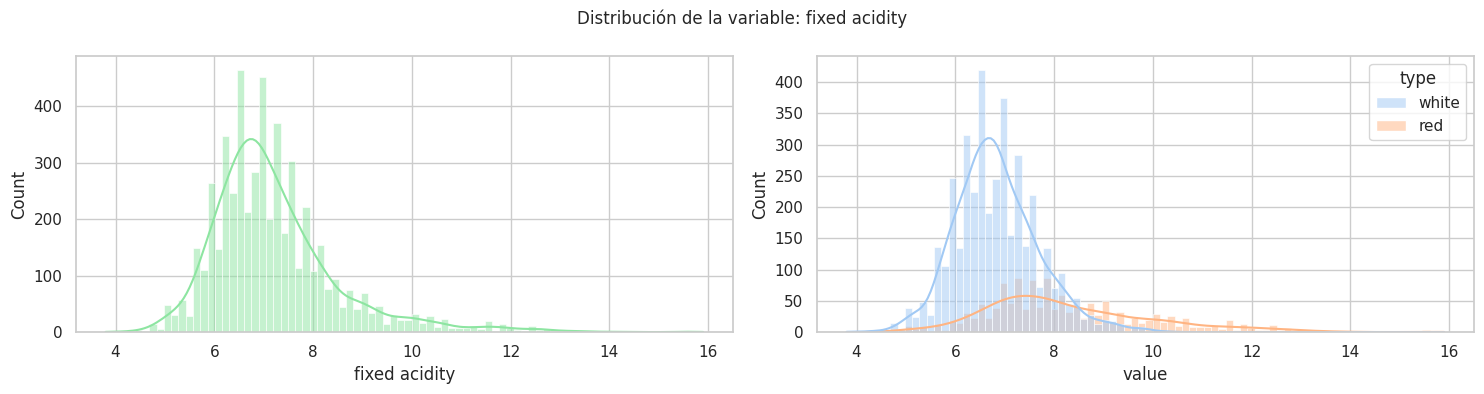

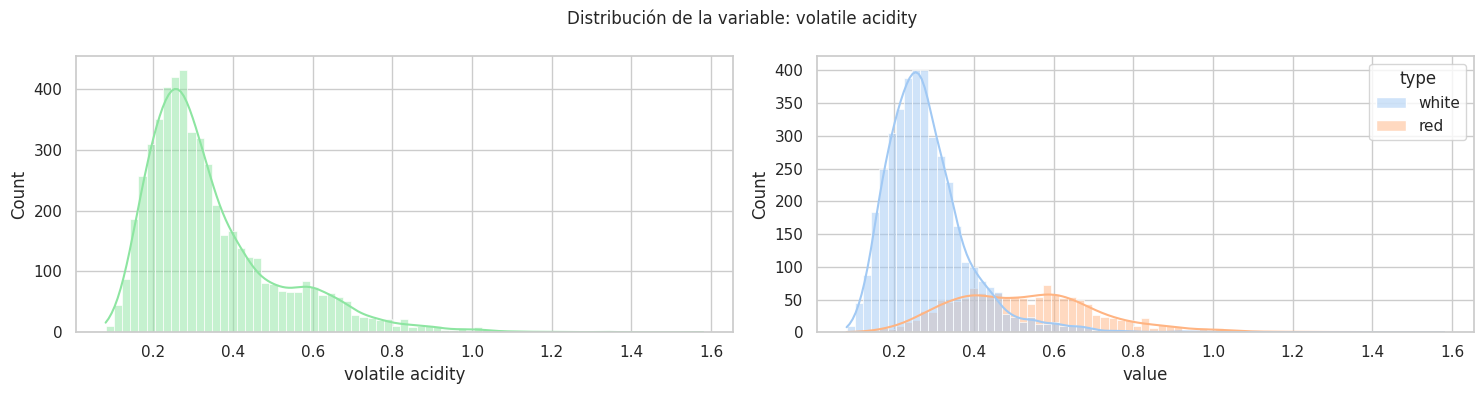

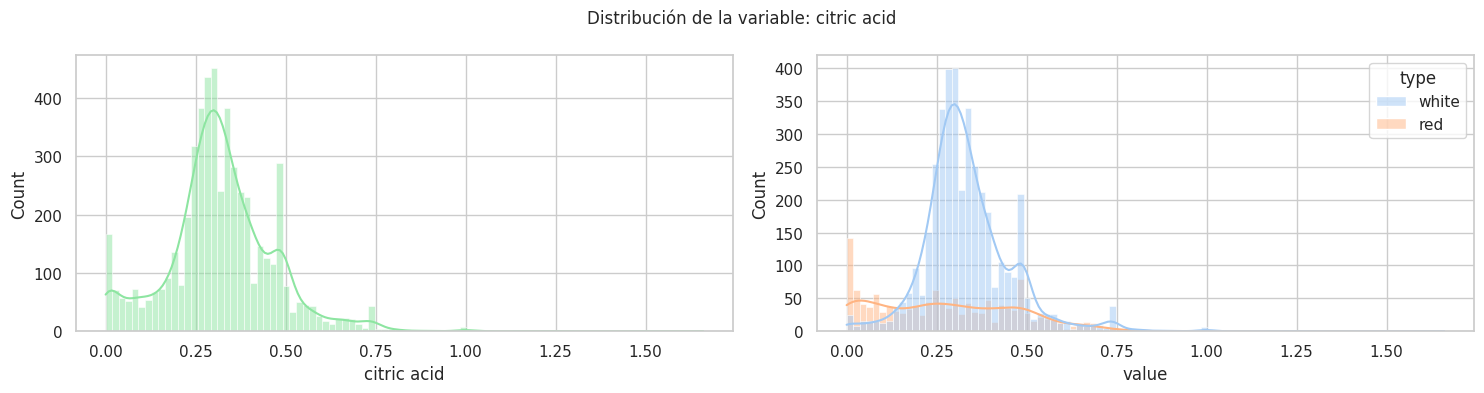

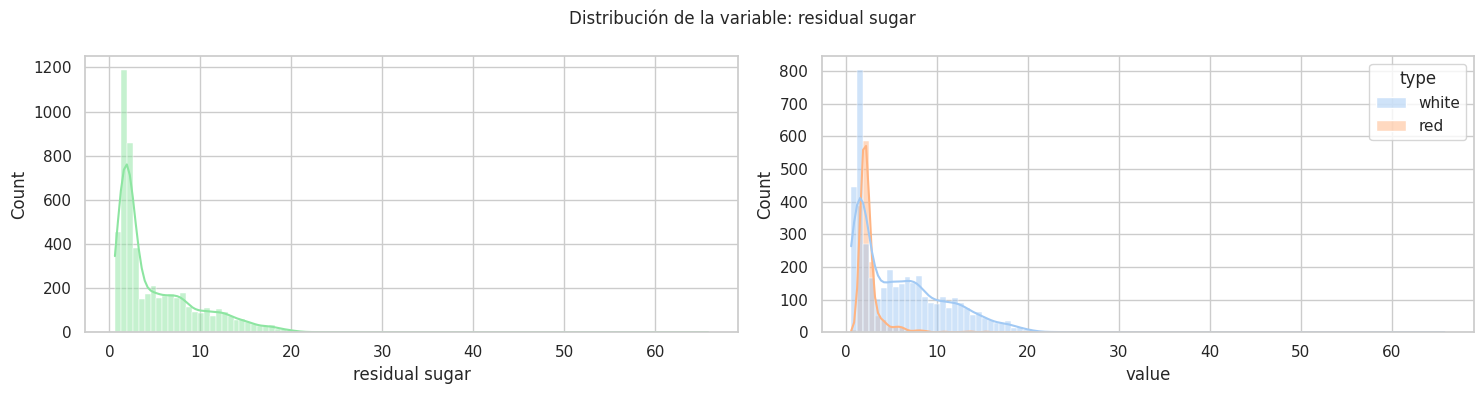

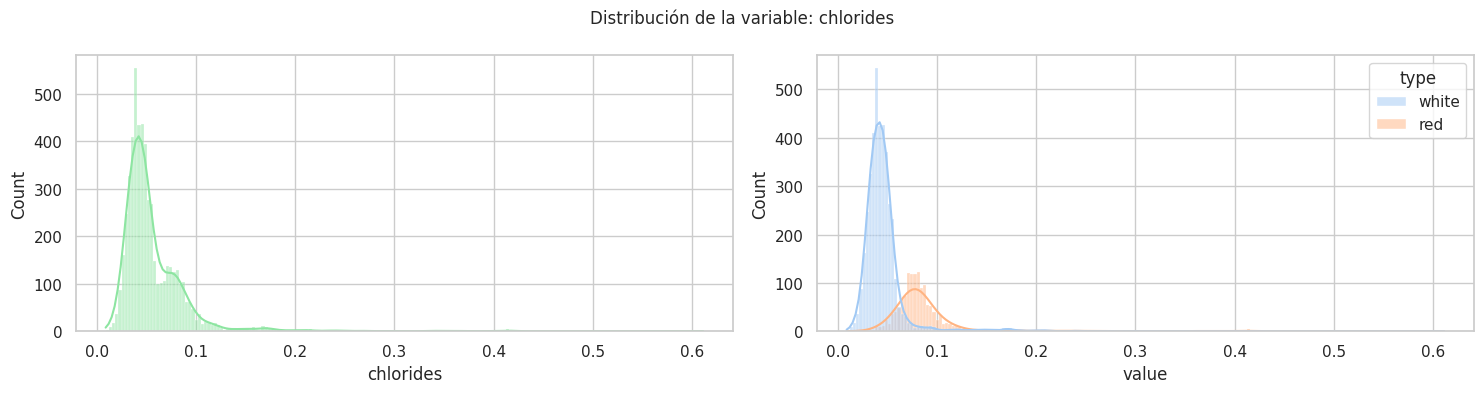

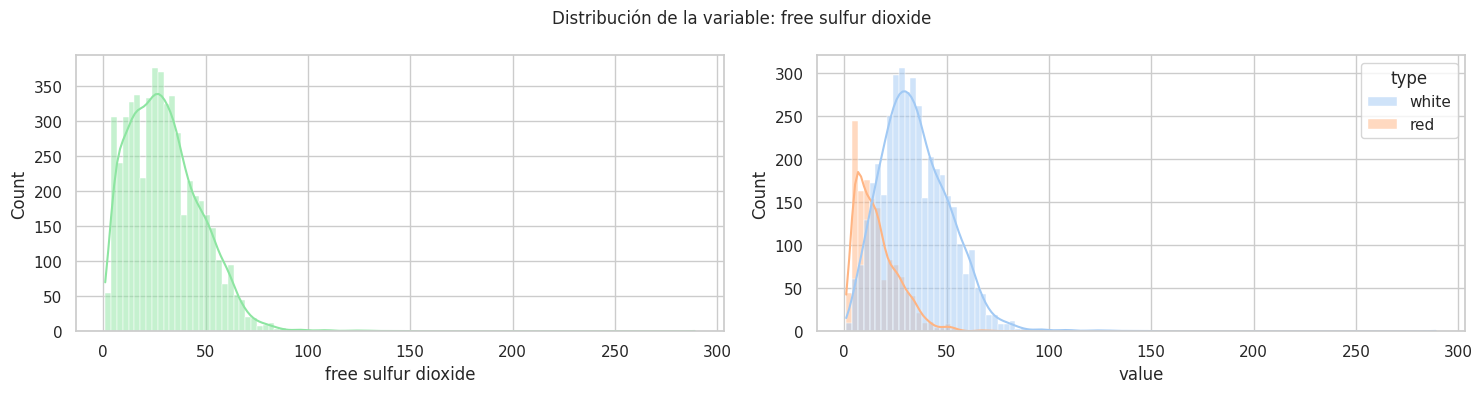

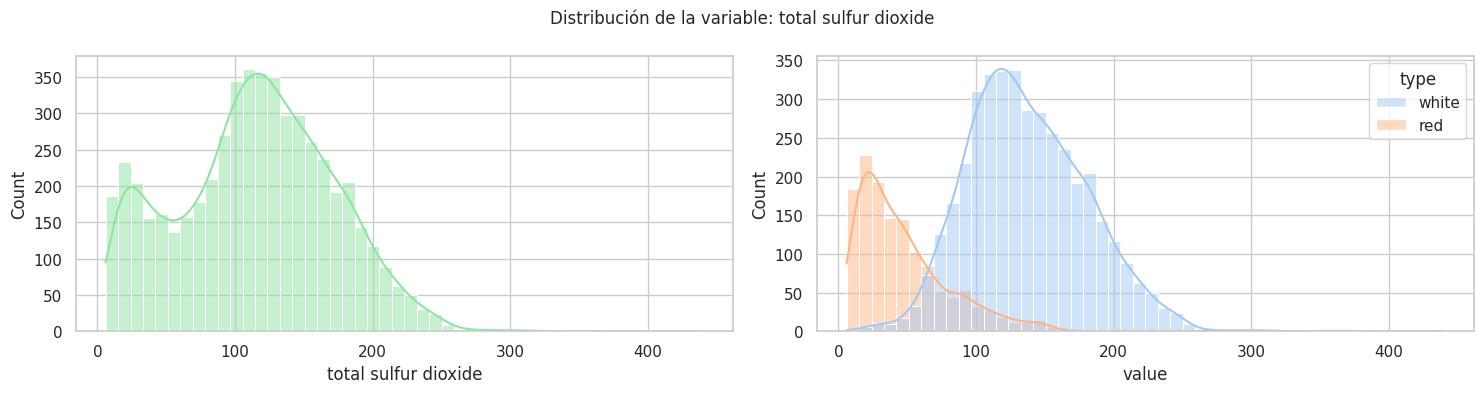

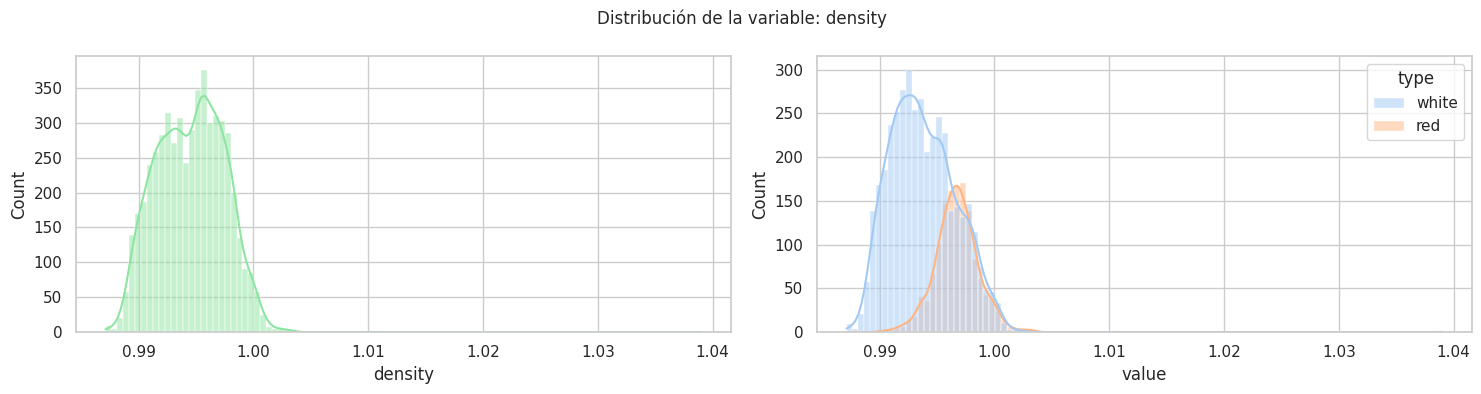

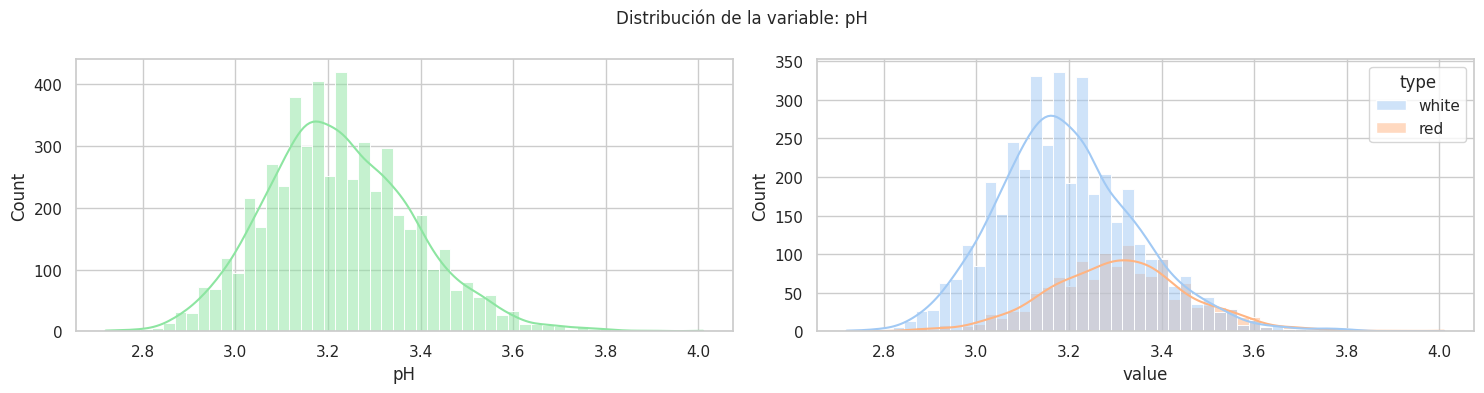

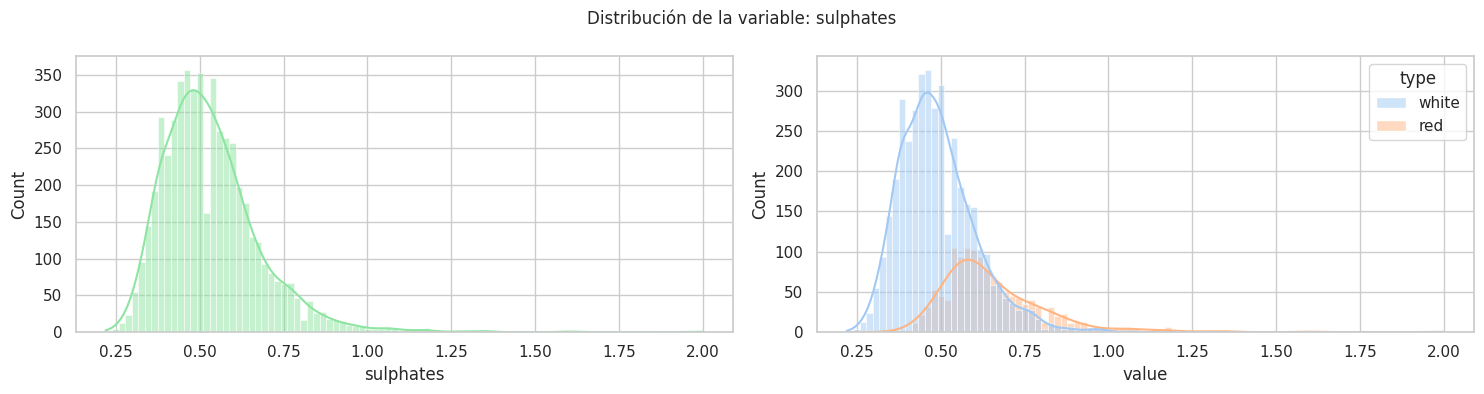

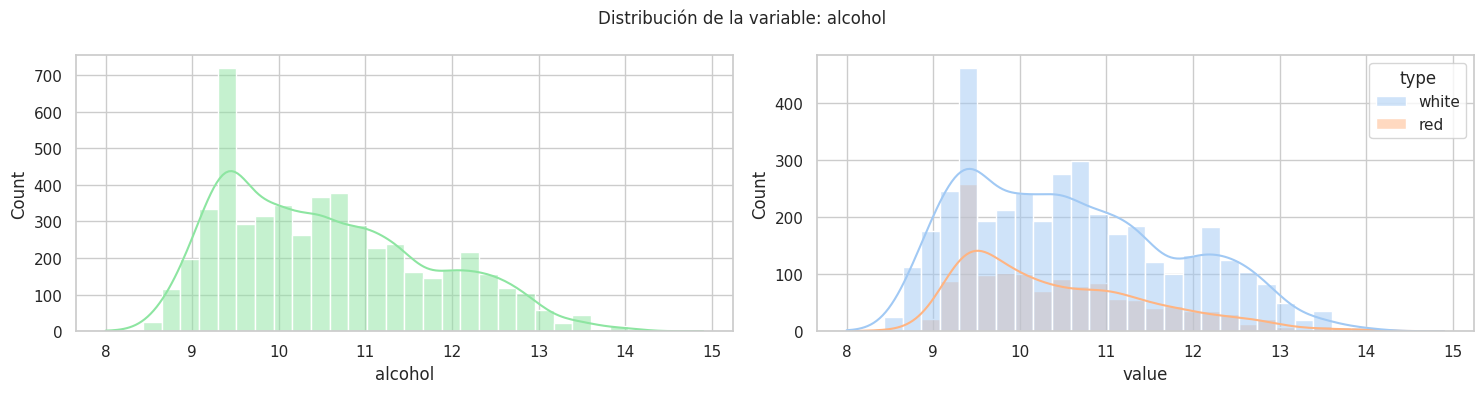

In [ ]:
# Se analizan en detalle las distribuciones según el tipo de vino.

caracteristica = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=caracteristica, var_name='feature', value_name='value')

for _, feature in enumerate(caracteristica):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.histplot(data=df[feature], kde=True, color='#8DE5A1', ax=axes[0])  # kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1], palette=custom_palette )
    #sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue=df_long['type'].map(type_label), kde=True, ax=axes[1], palette=custom_palette )
    plt.tight_layout()
    plt.show()

💡 INSIGHTS

De la observación de los histogramas pareciera que las siguientes variables siguen una distribución normal:
- En vinos blancos: "fixed acidity", "chlorides".
- En vinos tintos: "chlorides", "density", "pH"

**MEDIDAS DE ASIMETRÍA Y CURTOSIS**

Estas medidas informan sobre dos aspectos importantes de la forma de la distribución: su grado de asimetría y su grado de homogeneidad.

Un valor de **asimetría** (*skewness*) cercano a 0 (entre -0.5 y 0.5) indica que los datos están simétricamente distribuidos alrededor de la media. Valores positivos indican una distribución sesgada a la derecha (cola larga a la derecha), mientras que valores negativos indican una distribución sesgada a la izquierda (cola larga a la izquierda)

Por su parte, la **curtosis** (*kurtosis*) mide la heterogeneidad de la distribución de los datos (o la concentración de los valores de la variable). La curtosis de Fisher, que es la que calcula 'scipy.stats.describe', está normalizada para que una distribución normal tenga una curtosis de 0. Valores positivos indican mayor concentración de los datos en torno a la media; es decir, una distribución con colas más pesadas (más picos, menos colas). Mientras que valores negativos indican una distribución de los datos más alejados de la media; es decir, con colas más ligeras (menos picos, más colas).

Luego, una distribución normal idealmente tiene una asimetría cercana a 0 y una curtosis cercana a 0.

In [ ]:
# Se analiza la asimetría de las variables
'''
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=caracteristica, var_name='feature', value_name='value')

results = []                            # lista para almacenar los resultados

for feature in numerical_features:      # Calculo estadísticas descriptivas para cada característica
    statsWhite = stats.describe(df_white[feature])
    statsRed = stats.describe(df_red[feature])
    results.append([feature, statsWhite.skewness.round(3), statsWhite.kurtosis.round(3), statsRed.skewness.round(3), statsRed.kurtosis.round(3)])

results_df = pd.DataFrame(results, columns=['VARIABLE', 'Asim WHITE', 'Curt WHITE', 'Asim RED', 'Curt RED'])   # Se crea un DataFrame con los resultados

print(results_df)
'''

"\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=caracteristica, var_name='feature', value_name='value')\n\nresults = []                            # lista para almacenar los resultados\n\nfor feature in numerical_features:      # Calculo estadísticas descriptivas para cada característica\n    statsWhite = stats.describe(df_white[feature])\n    statsRed = stats.describe(df_red[feature])\n    results.append([feature, statsWhite.skewness.round(3), statsWhite.kurtosis.round(3), statsRed.skewness.round(3), statsRed.kurtosis.round(3)])\n\nresults_df = pd.DataFrame(results, columns=['VARIABLE', 'Asim WHITE', 'Curt WHITE', 'Asim RED', 'Curt RED'])   # Se crea un DataFrame con los resultados\n\nprint(results_df)\n"

In [ ]:
# Se analiza la asimetría de las variables WHITE

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
resultsWhite = []        # lista para almacenar los resultados

for feature in numerical_features:      # Calculo estadísticas descriptivas para cada característica
    resultsWhite.append([  feature,
                      df_white[feature].mean().round(3),
                      df_white[feature].median(),
                      df_white[feature].mode()[0],
                      stats.skew(df_white[feature]).round(3),
                      stats.kurtosis(df_white[feature]).round(3)])

results_df = pd.DataFrame(resultsWhite, columns=['Variable WHITE', 'Media', 'Mediana', 'Moda', 'Asimetría', 'Curtosis'])   # Se crea un DataFrame con los resultados
results_df

,Variable WHITE,Media,Mediana,Moda,Asimetría,Curtosis
0,fixed acidity,6.841,6.8000,6.800,0.695,2.261
1,volatile acidity,0.281,0.2600,0.280,1.644,5.323
2,citric acid,0.335,0.3200,0.300,1.308,6.809
3,residual sugar,5.920,4.7000,1.200,1.330,5.646
4,chlorides,0.046,0.0420,0.036,4.972,35.560
5,free sulfur dioxide,34.910,33.0000,29.000,1.560,13.348
6,total sulfur dioxide,137.249,133.0000,111.000,0.454,0.726
7,density,0.994,0.9935,0.992,1.269,14.112
8,pH,3.195,3.1800,3.160,0.457,0.558
9,sulphates,0.490,0.4800,0.500,0.936,1.551


In [ ]:
# Se analiza la asimetría de las variables RED

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
resultsRed = []          # lista para almacenar los resultados

for feature in numerical_features:      # Calculo estadísticas descriptivas para cada característica
    resultsRed.append([  feature,
                      df_red[feature].mean().round(3),
                      df_red[feature].median(),
                      df_red[feature].mode()[0],
                      stats.skew(df_red[feature]).round(3),
                      stats.kurtosis(df_red[feature]).round(3)])

results_df = pd.DataFrame(resultsRed, columns=['Variable RED', 'Media', 'Mediana', 'Moda', 'Asimetría', 'Curtosis'])   # Se crea un DataFrame con los resultados
results_df

,Variable RED,Media,Mediana,Moda,Asimetría,Curtosis
0,fixed acidity,8.313,7.9000,7.2000,0.940,1.048
1,volatile acidity,0.529,0.5200,0.5000,0.731,1.245
2,citric acid,0.273,0.2600,0.0000,0.312,-0.788
3,residual sugar,2.523,2.2000,2.0000,4.543,29.252
4,chlorides,0.088,0.0790,0.0800,5.496,38.478
5,free sulfur dioxide,15.893,14.0000,6.0000,1.225,1.881
6,total sulfur dioxide,46.826,38.0000,28.0000,1.539,4.023
7,density,0.997,0.9967,0.9968,0.045,0.823
8,pH,3.309,3.3100,3.3000,0.233,0.888
9,sulphates,0.659,0.6200,0.5400,2.406,11.068


💡 INSIGHTS

Según sus valores de asimetría y medidas de tendencia central, pareciera que las variables que más se aproximan a una distribución normal son:
* En vinos blancos: "alcohol", "total sulfur dioxide" y "pH"
* En vinos tintos: "density", "pH" y "citric acid"

No obstante, esto no se condice del todo con las imagenes de los histogramas correspondientes.

In [ ]:
"""
# Se analizan en detalle las distribuciones según el tipo de vino.

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 2, figsize=(16, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], color='#8DE5A1', ax=axes[0,0])
    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0,1])
    sns.histplot(df[feature], kde=True, color='#8DE5A1', ax=axes[1,0])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1,1])
    #axes[0].grid()
    #axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\n# Se analizan en detalle las distribuciones según el tipo de vino.\n\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 2, figsize=(16, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], color='#8DE5A1', ax=axes[0,0])\n    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0,1])\n    sns.histplot(df[feature], kde=True, color='#8DE5A1', ax=axes[1,0])  # Se usa histplot con kde=True para incluir la curva de densidad\n    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1,1])\n    #axes[0].grid()\n    #axes[1].grid()\n    plt.tight_layout() # 

-----------------
Mediante la **Prueba de Shapiro-Wilks** se mide el grado de ajuste existente entre la distribución del conjunto de datos analizados y una distribución normal. El objetivo es validar si los datos provienen de una población tienen la distribución teórica especificada contrastando si las observaciones podrían razonablemente proceder de una distribución gaussiana.

Esta prueba estadística contrasta la hipótesis nula con la hipótesis alternativa, siendo:
- **Ho:** Los datos provienen de una distribución normal.
- **Ha:** Los datos no siguen una distribución normal.

Se evalúa el nivel de significancia (0,05), tal que:
- si **p-value <= 0,05** se rechaza la hipótesis nula, sugiriendo que la distribución de los datos no es normal.
- si **p-value > 0,05** no se puede rechazar la hipótesis nula, sugiriendo que los datos siguen una distribución normal.

---
**NOTA:** Este método es adecuado para muestras pequeñas y medianas. Las **pruebas de normalidad**, son pruebas poco potentes cuando el tamaño de la muestra es pequeño (n <= 30). Al basarse en la hipótesis nula de normalidad, podemos no alcanzar significación estadística por falta de potencia estadística, asumiendo erróneamente que los datos siguen una distribución normal (al no poder rechazar la hipótesis nula). Por otra parte, cuando la muestra es muy grande (n > 30), ocurre lo contrario: será suficiente una pequeña desviación de la normalidad para que la prueba nos dé una p significativa y rechacemos la hipótesis nula, cuando la mayor parte de las técnicas paramétricas tolerarían pequeñas desviaciones de la normalidad si la muestra es grande. Aunque, para estos casos aplica el ***Teorema Central del Límite*** que indica que cuando se extraen muestras de tamaño mayor a 30, la distribución muestral de medias tiene un comportamiento aproximadamente normal.


In [ ]:
# Se arma un diciconario con las variables por tipo a analizar con el test estadístico
diccionario = {'fixed acidity':1, 'alcohol':1, 'total sulfur dioxide':1, 'pH':1, 'chlorides':1, 'density':0, 'pH':0, 'chlorides':0, 'citric acid':0}

In [ ]:
# Se aplica el test de Shapiro-Wilks a las variables identificadas

nivel_significancia = 0.05

# Test de Shapiro
for clave, valor in diccionario.items():
  if diccionario[clave] == 1:
      shapiro_test = shapiro(df_white[clave])
      vino = "blanco"
  else:
      shapiro_test = shapiro(df_red[clave])
      vino = "tinto"
  shapiro_pvalue = shapiro_test.pvalue
  distribucion = lambda shapiro_pvalue: 'siguen' if shapiro_pvalue > nivel_significancia else 'NO siguen'
  resultado = distribucion(shapiro_pvalue)
  print(f'El p-value de "{clave}" (para vino {vino}) es {shapiro_pvalue}, por lo tanto los datos {resultado} una distribución normal.')


El p-value de "fixed acidity" (para vino blanco) es 3.226072373647057e-26, por lo tanto los datos NO siguen una distribución normal.
El p-value de "alcohol" (para vino blanco) es 3.8035744335138836e-31, por lo tanto los datos NO siguen una distribución normal.
El p-value de "total sulfur dioxide" (para vino blanco) es 4.956564631223955e-19, por lo tanto los datos NO siguen una distribución normal.
El p-value de "pH" (para vino tinto) es 2.420898102121493e-06, por lo tanto los datos NO siguen una distribución normal.
El p-value de "chlorides" (para vino tinto) es 1.7315154816951283e-52, por lo tanto los datos NO siguen una distribución normal.
El p-value de "density" (para vino tinto) es 1.8043209191584517e-06, por lo tanto los datos NO siguen una distribución normal.
El p-value de "citric acid" (para vino tinto) es 7.516202643269317e-20, por lo tanto los datos NO siguen una distribución normal.


-----------------
El **QQ-Plot** es un gráfico que también nos permite analizar la normalidad de los datos mediante la comparación de cuantiles. Permite comparar la distribución de un conjunto de datos con una distribución teórica, como la distribución normal.

De esta manera, si los datos siguen una distribución normal, se alinearán cerca de la diagonal del gráfico. Cuanto más se alejen, menos probable será que nuestros datos sigan una distribución normal.

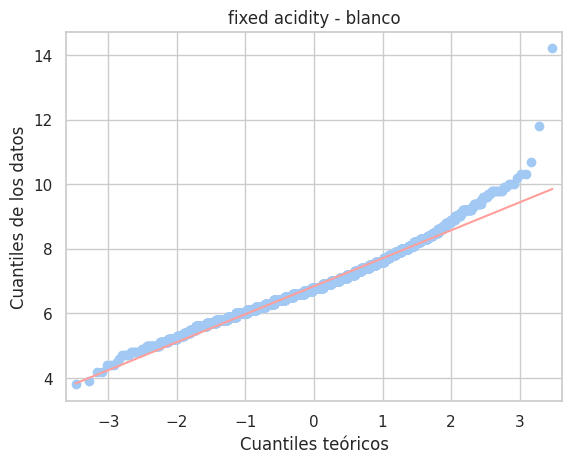

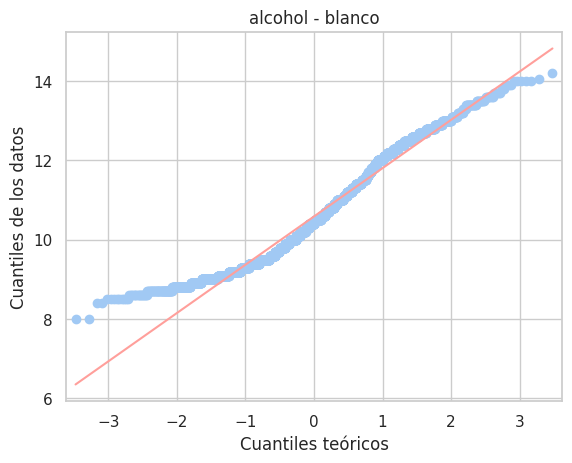

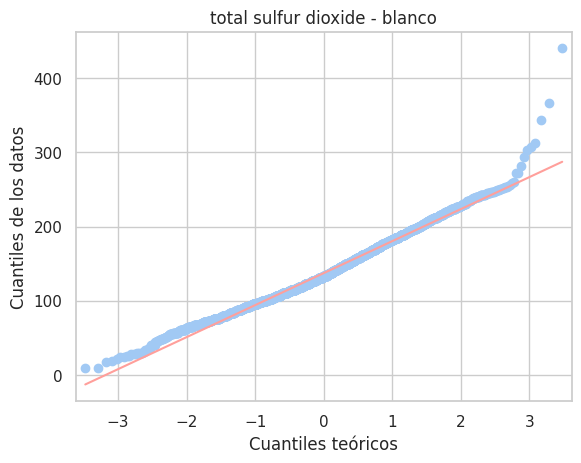

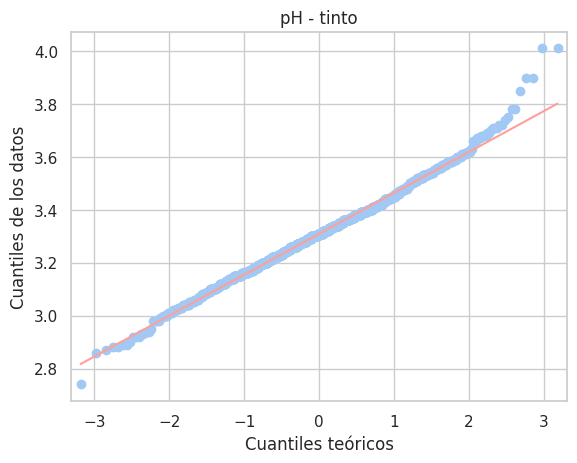

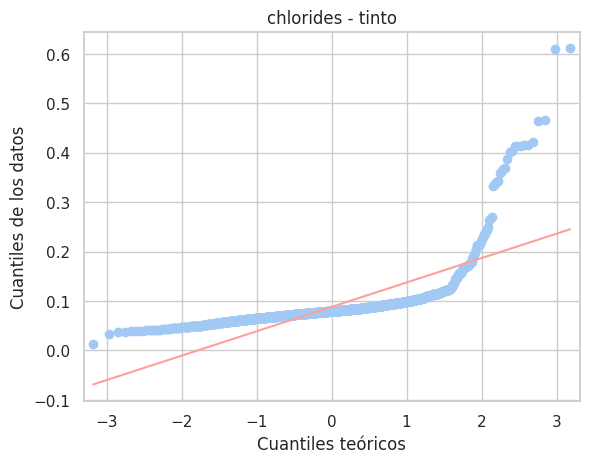

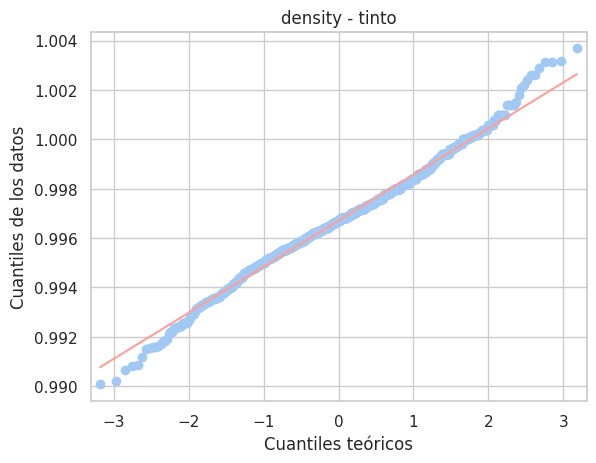

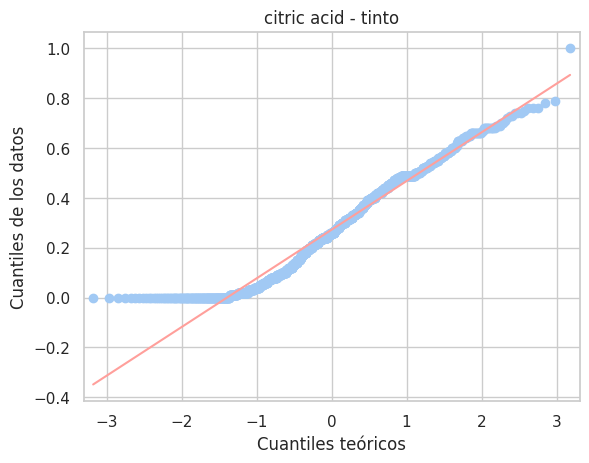

In [ ]:
# QQ plot para complementar el test estadístico

#fig, axes = plt.subplots(len(caracteristicas), 2, figsize=(12, len(caracteristicas) * 4))

for clave, valor in diccionario.items():

  if diccionario[clave] == 1:
    sm.qqplot(df_white[clave], line='s')
    vino = "blanco"
  else:
    sm.qqplot(df_red[clave], line='s')
    vino = "tinto"

  plt.xlabel('Cuantiles teóricos')
  plt.ylabel('Cuantiles de los datos')
  plt.title(clave + " - " + vino)
  plt.show()

💡 INSIGHTS

Del análisis de los QQ-Plots se concluye que:
- La variable **"fixed acidity"** para los vinos blancos no sigue una distribución normal dado que la cola superior (extremo) del gráfico se desvía significativamente de la línea recta.
- La variable **"chlorides"** para los vinos blancos no sigue la línea recta diagonal de la distribución normal.
- Las variables **"density"** y **"pH"** para los vinos tintos se aproximan a la distribución normal (aunque los puntos extremos del gráfico se desvían levemente de la línea recta diagonal).

#### **◾ DETECCIÓN Y MANEJO DE OUTLIERS**

Antes de detectar outliers se analizan los datos para identificar valores física/químicamente imposibles o alejados de los valores aceptables; es decir, valores que puedan ser incorrectos o incosistentes con el dominio del problema (anormales). Para ello se relevan los datos tolerables extremos que serán utilizados como límites para los valores de las distintas variables.

In [ ]:
# Se identifican los valores tolerables 'extremos' de cada variable.

df_white = df_white.copy()
df_red = df_red.copy()

# Características a analizar
caracteristicas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Lectura del dataset de valores extremos admitidos para cada caracteristica
url = "https://raw.githubusercontent.com/eugeinga/CODER-DataScienceII/main/DATASET/ValoresExtremos.csv"
df_extremos = pd.read_csv(url)

df_extremos.index = caracteristicas
df_extremos

,caracteristica,white_min,white_max,red_min,red_max
fixed acidity,fixed acidity,3.000,14.00,3.00,16.00
volatile acidity,volatile acidity,0.100,1.20,0.20,1.60
citric acid,citric acid,0.000,1.00,0.00,1.00
residual sugar,residual sugar,1.000,45.00,1.00,15.00
chlorides,chlorides,0.010,0.30,0.01,0.60
free sulfur dioxide,free sulful dioxide,5.000,70.00,5.00,50.00
total sulfur dioxide,total sulful dioxide,25.000,400.00,15.00,250.00
density,density,0.989,1.03,0.99,1.01
pH,pH,2.800,3.80,3.00,4.00
sulphates,sulphates,0.300,2.00,0.30,1.50


In [ ]:
for i in caracteristicas:
    variable = i.replace(" ", "_") + "_O"
    df_white.loc[:, variable] = df_white[i].apply(lambda x: 'NO' if df_extremos.loc[i, 'white_min'] <= x <= df_extremos.loc[i, 'white_max'] else 'SI')
    df_red.loc[:, variable] = df_red[i].apply(lambda x: 'NO' if df_extremos.loc[i, 'red_min'] <= x <= df_extremos.loc[i, 'red_max'] else 'SI')

df_red.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,volatile_acidity_O,citric_acid_O,residual_sugar_O,chlorides_O,free_sulfur_dioxide_O,total_sulfur_dioxide_O,density_O,pH_O,sulphates_O,alcohol_O
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4903,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [ ]:
#Se identifican los registros que tienen algún outlier en las variables seleccionadas.

outlier_columns = [col for col in df_white.columns if col.endswith('_O')]
df_white_outliers = df_white[df_white[outlier_columns].eq('SI').any(axis=1)]
print(f"df_white_outliers: {len(df_white_outliers)}")

outlier_columns = [col for col in df_red.columns if col.endswith('_O')]
df_red_outliers = df_red[df_red[outlier_columns].eq('SI').any(axis=1)]
print(f"df_red_outliers: {len(df_red_outliers)}")

df_white_outliers: 291
df_red_outliers: 234


In [ ]:
#df_red_outliers[df_red_outliers.quality > 7].describe().round(3)
df_red_outliers.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000
mean,8.574,0.512,0.294,2.743,0.095,10.188,27.536,0.997,3.278,0.678,10.655,5.645
std,1.919,0.228,0.218,2.086,0.071,13.749,38.503,0.002,0.191,0.250,1.134,1.014
min,5.000,0.120,0.000,0.900,0.039,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.225,0.340,0.062,1.800,0.065,4.000,11.000,0.995,3.180,0.540,9.625,5.000
50%,8.200,0.490,0.320,2.100,0.077,5.000,13.000,0.996,3.290,0.620,10.550,6.000
75%,9.800,0.653,0.460,2.600,0.097,7.000,21.000,0.998,3.390,0.740,11.475,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [ ]:
#df_white_outliers[df_white_outliers.quality > 7].describe().round(3)
df_white_outliers.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000
mean,6.720,0.294,0.326,4.315,0.043,43.141,129.325,0.992,3.165,0.439,11.171,5.811
std,1.163,0.131,0.152,5.556,0.034,34.584,60.639,0.004,0.168,0.141,1.469,1.055
min,4.200,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.000,0.210,0.265,1.000,0.032,18.500,87.000,0.989,3.055,0.340,10.000,5.000
50%,6.600,0.270,0.310,1.800,0.037,32.000,119.000,0.992,3.160,0.410,11.000,6.000
75%,7.200,0.350,0.380,6.400,0.044,73.000,167.000,0.994,3.250,0.510,12.500,6.000
max,14.200,0.965,1.660,65.800,0.346,289.000,440.000,1.039,3.820,0.990,14.200,8.000


In [ ]:
#df_red_outliers[df_red_outliers.quality > 7]

In [ ]:
outlier_counts_white = df_white[[col for col in df_white.columns if col.endswith('_O')]].apply(lambda x: x.value_counts().get('SI', 0))
outlier_counts_red = df_red[[col for col in df_red.columns if col.endswith('_O')]].apply(lambda x: x.value_counts().get('SI', 0))

outlier_df = pd.DataFrame({
    "Outliers BLANCOS": outlier_counts_white,
    "Outliers TINTOS": outlier_counts_red
})

outlier_df

,Outliers BLANCOS,Outliers TINTOS
fixed_acidity_O,1,0
volatile_acidity_O,4,12
citric_acid_O,2,0
residual_sugar_O,72,3
chlorides_O,3,2
free_sulfur_dioxide_O,104,91
total_sulfur_dioxide_O,8,158
density_O,67,0
pH_O,7,26
sulphates_O,43,7


In [ ]:
# se calcula la proporción de valores atípicos respecto al total del dataset bajo estudio.
porcAtipicosWhite = len(outlier_counts_white) / len(df_white)
porcAtipicosRed = len(outlier_counts_red) / len(df_red)
print(f"Los valores atípicos en vinos BLANCOS representan el {porcAtipicosWhite:.3f} % del dataset")
print(f"Los valores atípicos en vinos TINTOS representan el {porcAtipicosRed:.3f} % del dataset")

Los valores atípicos en vinos BLANCOS representan el 0.003 % del dataset
Los valores atípicos en vinos TINTOS representan el 0.008 % del dataset


Dado que la cantidad de registros identificados es poco significativa y no se observan desviaciones importantes respecto a los valores esperados, NO se eliminarán del conjunto de datos.

Una vez removidos los valores anómalos, se procede a identificar valores outliers mediante técnicas como:
* Métodos estadísticos como la Regla Empírica (68-95-99.7). Funciona bastante bien para distribuciones normales o muy cercanas a la normal.
* Métodos estadísticos como las Medidas de tendencia central y dispersión. Aunque este método no tiene en cuenta la asimetría de la distribución.
* Rango Intercuartílico, mediante el suo del diagrama de caja (boxplot).
* MAD (Median Absolute Deviation), ideal en el caso de distribuciones asimétricas.

**REGLA EMPIRICA**

Se analizan los datos de las variables "density" y "pH" de los vinos tintos que, según el análisis del apartado anterior, se aproximan a la distribución normal, donde la media +/- 3*DS (Desviaciones estándar) captura el 99,7 % de las observaciones. De esta manera, cualquier valor que quede fuera del rango mencionado se considerarán una anomalía.

In [ ]:
# Se arma un diciconario con las variables que se aproximan a la distribución normal
variablesNormales = {'density':0, 'pH':0}

In [ ]:
# Se calcula el z-score para identificar outliers

totalOutliers = pd.DataFrame()

for clave, valor in variablesNormales.items():

  if valor == 1: # vino = "blanco"
    df_white.loc[:, "variableZ"] = (df_white[clave] - df_white[clave].mean()) / df_white[clave].std()
    df_white.loc[:, "Outlier"] = 0
    df_white.loc[(df_white["variableZ"] > 3) | (df_white["variableZ"] < -3), "Outlier"] = 1
    outliers = df_white.copy()

  else: # vino = "tinto"
    df_red.loc[:, "variableZ"] = (df_red[clave] - df_red[clave].mean()) / df_red[clave].std()
    df_red.loc[:, "Outlier"] = 0
    df_red.loc[(df_red["variableZ"] > 3) | (df_red["variableZ"] < -3), "Outlier"] = 1
    outliers = df_red.copy()

  # Se agrega una columna para identificar la variable
  outliers.loc[:, 'variable'] = clave
  outliers.loc[:, 'type'] = valor

  # se concatenan  los resultados
  totalOutliers = pd.concat([totalOutliers, outliers], ignore_index=True)

resultadoOutliers = totalOutliers.groupby(["variable", "type", "Outlier"]).size().reset_index(name='count')
resultadoOutliers

,variable,type,Outlier,count
0,density,0,0,1346
1,density,0,1,13
2,pH,0,0,1351
3,pH,0,1,8


In [ ]:
# Se listan los valores outliers

outliersZ = totalOutliers[totalOutliers['Outlier'] == 1]
outliersZ

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,chlorides_O,free_sulfur_dioxide_O,total_sulfur_dioxide_O,density_O,pH_O,sulphates_O,alcohol_O,variableZ,Outlier,variable
385,0,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,...,NO,NO,NO,NO,SI,NO,NO,3.473162,1,density
420,0,10.6,0.280,0.39,15.50,0.069,6.0,23.0,1.00260,3.12,...,NO,NO,NO,NO,NO,NO,NO,3.152121,1,density
483,0,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,...,NO,NO,NO,NO,SI,NO,NO,3.446409,1,density
485,0,15.6,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,...,NO,NO,NO,NO,SI,NO,NO,3.446409,1,density
528,0,10.1,0.650,0.37,5.10,0.110,11.0,65.0,1.00260,3.32,...,NO,NO,NO,NO,NO,NO,NO,3.152121,1,density
722,0,6.7,0.280,0.28,2.40,0.012,36.0,100.0,0.99064,3.26,...,NO,NO,NO,NO,NO,NO,NO,-3.247307,1,density
764,0,10.7,0.900,0.34,6.60,0.112,23.0,99.0,1.00289,3.22,...,NO,NO,NO,NO,NO,NO,NO,3.307291,1,density
866,0,8.0,0.180,0.37,0.90,0.049,36.0,109.0,0.99007,2.89,...,NO,NO,NO,NO,SI,NO,NO,-3.552296,1,density
948,0,5.0,0.400,0.50,4.30,0.046,29.0,80.0,0.99020,3.49,...,NO,NO,NO,NO,NO,NO,NO,-3.482737,1,density
1081,0,5.5,0.490,0.03,1.80,0.044,28.0,87.0,0.99080,3.50,...,NO,NO,NO,NO,NO,NO,NO,-3.161696,1,density


In [ ]:
# se calcula la proporción de valores atípicos respecto al total del dataset bajo estudio.
porcAtipicos = len(outliersZ) / len(df)
print(f"Los valores atípicos identificados representan el {porcAtipicos:.3f} % del dataset")

Los valores atípicos identificados representan el 0.004 % del dataset


Dado que la cantidad de registros identificados no es significativa se procede a eliminarlos del conjunto de datos

In [ ]:
print("Dimensiones del dataset antes de la remoción de outliers: ", df.shape)
df = df[~df.index.isin(outliersZ.index)]
print("Dimensiones del dataset luego de la remoción de outliers: ", df.shape)

Dimensiones del dataset antes de la remoción de outliers:  (5329, 13)
Dimensiones del dataset luego de la remoción de outliers:  (5313, 13)


**REANGO INTERCUARTÍLICO**

Para aquellas variables que no siguen una distribución normal se debe emplear métodos no paramétricos para la identificación de outliers.

Se analizarán los Sulfitos en los vinos blancos mediante el Método de Rango Intercuartílico.

In [ ]:
q1 = np.percentile(df_white['sulphates'], 25)
q3 = np.percentile(df_white['sulphates'], 75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5* iqr

sulphatesOutliers = df_white[(df_white['sulphates'] < limite_inferior) | (df_white['sulphates']> limite_superior)]
sulphatesOutliers['sulphates'].describe().round(3)


,sulphates
count,96.000
mean,0.843
std,0.076
min,0.770
25%,0.780
50%,0.820
75%,0.880
max,1.080


Los valores extremos admitidos para la cantidad de sulfitos está entre 0.3 y 1.5. Por lo tanto, los valores hallados no son en realidad valores outliers.

Luego, mediante **BOXPLOTS** se analizan de manera gráfica y rápida los valores extremos de cada variable (numérica contínua).

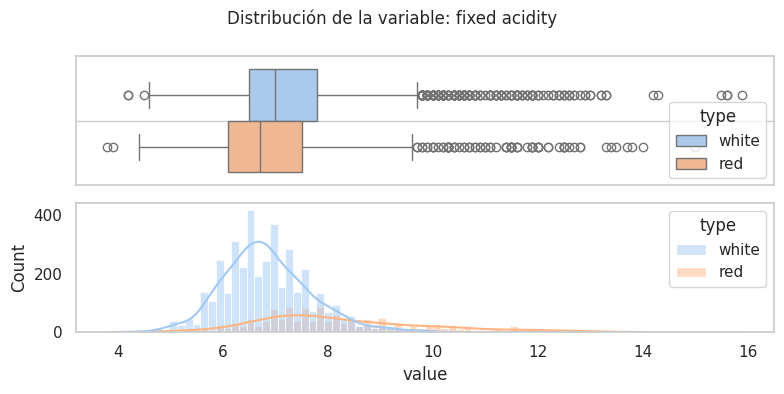

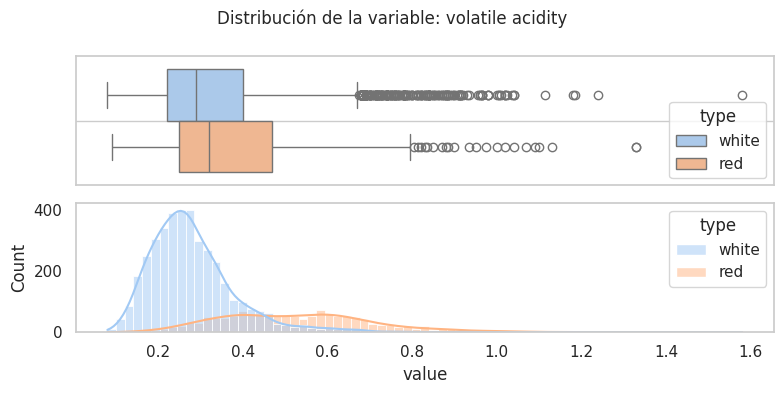

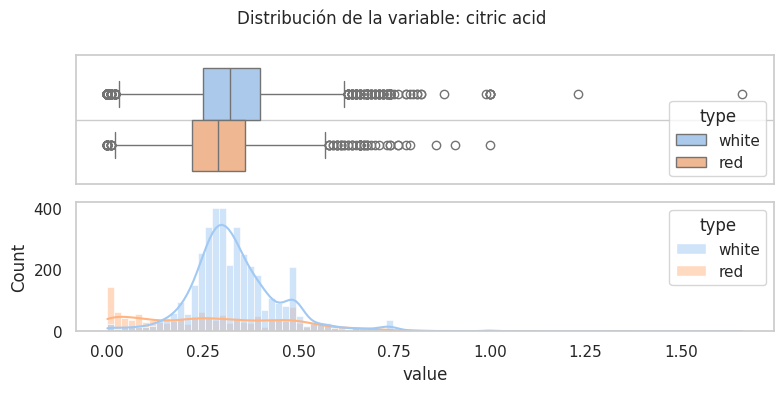

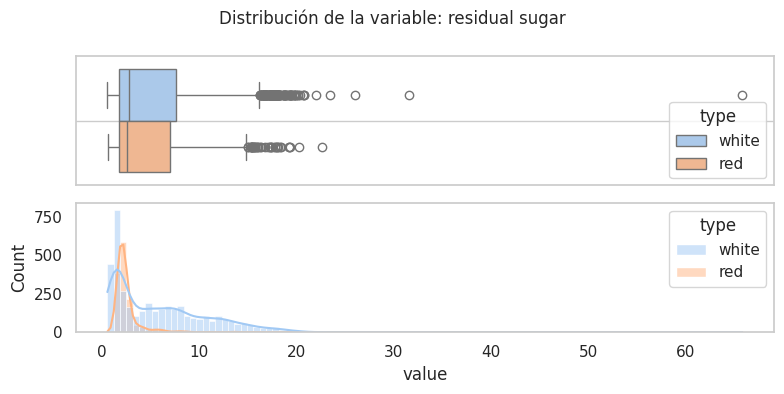

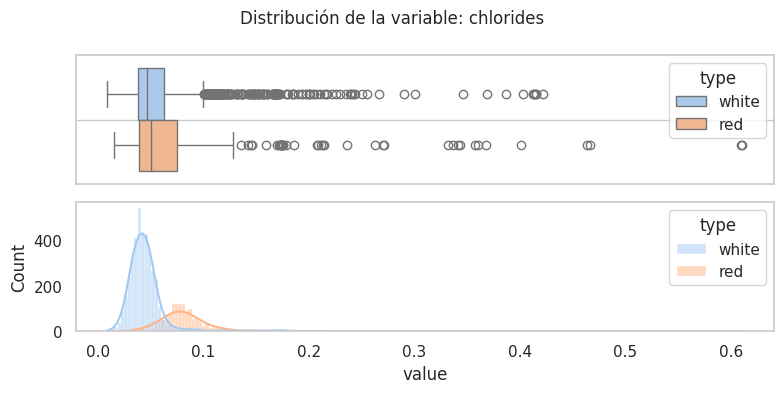

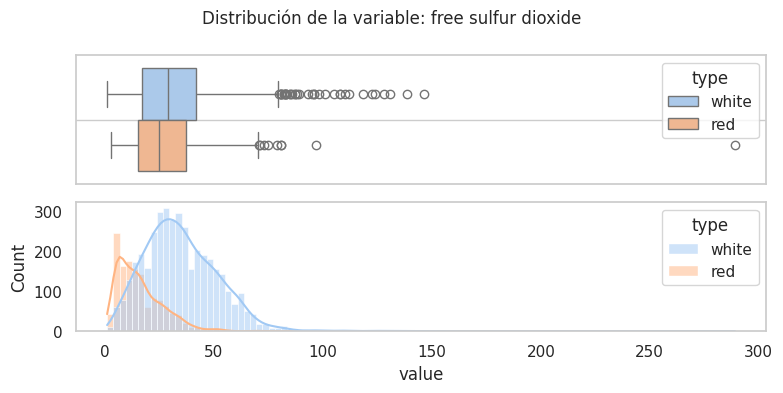

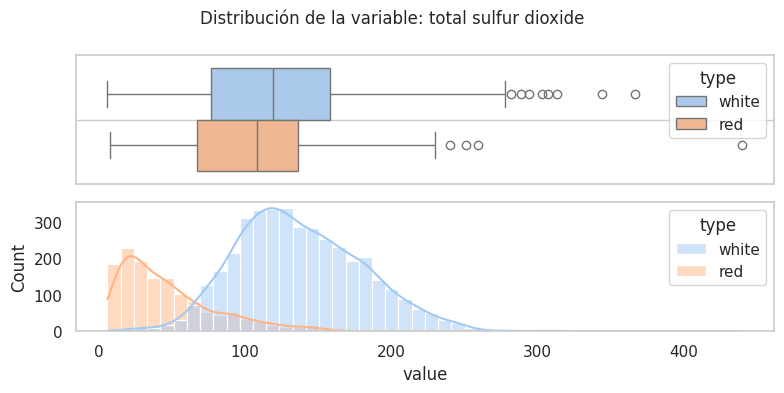

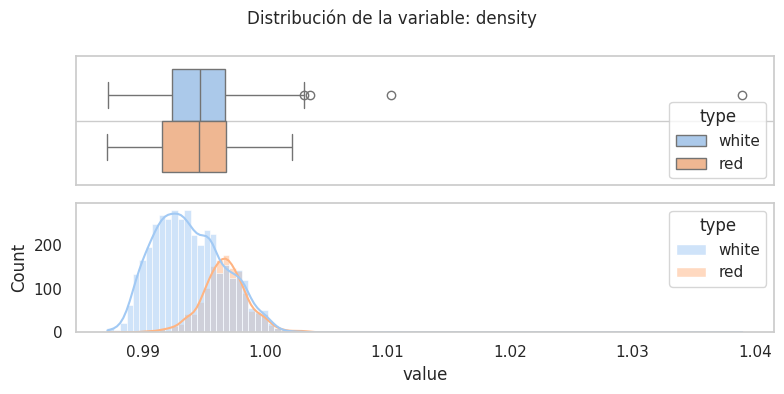

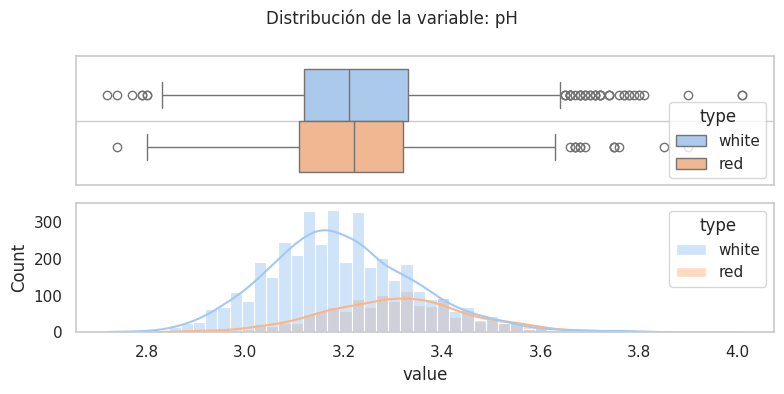

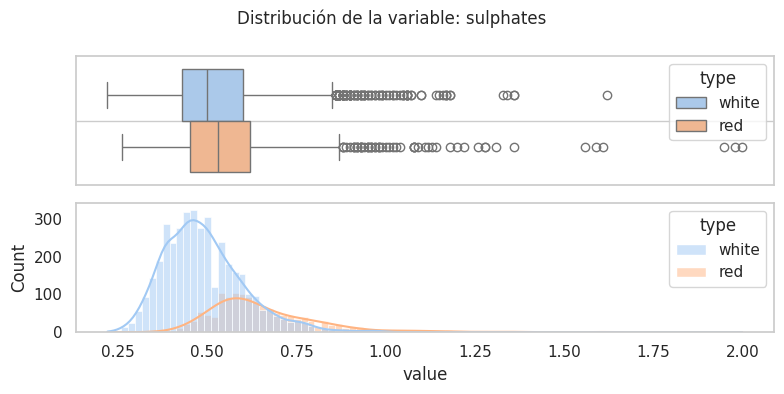

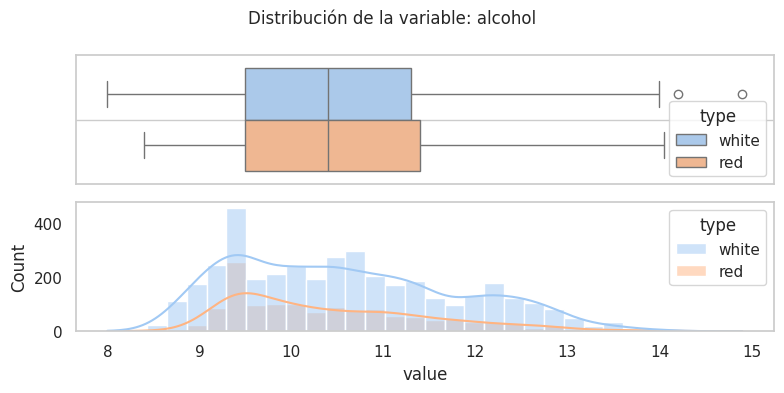

In [ ]:
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], hue=df_long['type'], ax=axes[0], palette=custom_palette)
    #sns.boxplot(x=df[feature], hue=df_long['type'].map(type_label), ax=axes[0], palette=custom_palette)
    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue=df_long['type'], kde=True, ax=axes[1], palette=custom_palette)
    #sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue=df_long['type'].map(type_label), kde=True, ax=axes[1], palette=custom_palette)
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()

💡 INSIGHTS

Si bien a simple vista pareciera que existen outliers para las variables bajo estudio, en general, estos valores se encuentran dentro del dominio esperado a excepción de los outliers asociados a los niveles de azufre que están por encima del valor máximo admisible.

Según las averiguaciones realizadas los niveles de dióxido de azufre en vinos blancos europeos suelen estar por debajo de 250 partes por millón (ppm).

In [ ]:
df_filtered = df[df['total sulfur dioxide'] > 250]
total_by_type = df_filtered.groupby('type').size().reset_index(name='count')
total_by_type

,type,count
0,red,2
1,white,20


In [ ]:
df_filtered

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
111,white,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.9,5
227,white,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,white,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,white,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
403,white,7.1,0.270,0.31,18.20,0.046,55.0,252.0,1.00000,3.07,0.56,8.7,5
746,white,7.0,0.210,0.34,8.50,0.033,31.0,253.0,0.99530,3.22,0.56,10.5,6
1337,white,6.7,0.180,0.30,6.40,0.048,40.0,251.0,0.99560,3.29,0.52,10.0,5
1417,white,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,white,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
1940,white,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5


In [ ]:
# se calcula la proporción de valores atípicos respecto al total del dataset bajo estudio.
porcAtipicos = len(df_filtered) / len(df)
print(f"Los valores atípicos identificados representan el {porcAtipicos:.2f} % del dataset")

Los valores atípicos identificados representan el 0.00 % del dataset


Dado que la cantidad de registros identificados es poco significativa y se corresponden con registros de calidad media (donde se encuentran la mayoría de los registros), se procede a eliminarlos del conjunto de datos.

In [ ]:
print("Dimensiones del dataset antes de la remoción de outliers: ", df.shape)
df = df.drop(df_filtered.index)
df = df.reset_index(drop=True)
print("Dimensiones del dataset luego de la remoción de outliers: ", df.shape)

Dimensiones del dataset antes de la remoción de outliers:  (5313, 13)
Dimensiones del dataset luego de la remoción de outliers:  (5291, 13)


**MAD (Median Absolute Deviation)**

Analizaremos el caso de la variable 'residual sugar' en vinos blancos mediantes el método de las desvuacuines absolutas medianas.

In [ ]:
# Calculo de las desviaciones absolutas medianas
variable = 'residual sugar'
median = np.median(df_white[variable])
mad = np.median(np.abs(df_white[variable] - median))

# Se defune el umbral para los outliers (por lo general entre 2,5 hasta 3,5)
threshold = 3

# Detección de outliers
outliersMAD = df_white[variable][np.abs(df_white[variable] - median) / mad > threshold]

#veamos los resultados finales
#print("Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):")
#print(outliers)
outliersMAD.describe().round(3)

,residual sugar
count,279.000
mean,16.818
std,3.599
min,14.300
25%,15.050
50%,16.200
75%,17.800
max,65.800


In [ ]:
outliersMAD[outliersMAD > 45]

,residual sugar
2781,65.8


Sólo hay un registro correspondiente a vino blanco con un valor de "residual sugar" superior a 45 (valor extremo superior). Éste registro se elimina del dataset.

In [ ]:
print("Dimensiones del dataset antes de la remoción de outliers: ", df.shape)
df_filtered = df[df['residual sugar'] > 45]
df = df.drop(df_filtered.index)
df = df.reset_index(drop=True)
print("Dimensiones del dataset luego de la remoción de outliers: ", df.shape)

Dimensiones del dataset antes de la remoción de outliers:  (5291, 13)
Dimensiones del dataset luego de la remoción de outliers:  (5290, 13)


In [ ]:
#print("Dimensiones del dataset antes de la remoción de outliers: ", df.shape)
#outliers = pd.concat([df_white_outliers, df_red_outliers])
#outlier_indices = outliers.index
#df = df.drop(outlier_indices)
#df = df.reset_index(drop=True)
#print("Dimensiones del dataset luego de la remoción de outliers: ", df.shape)

### **◼️ ANÁLISIS BIVARIADO**
----

#### **◾ ANÁLISIS DE CORRELACIÓN Y DEPENDENCIA ENTRE VARIABLES**

Analizo la correlación de las variables por tipo de vino.

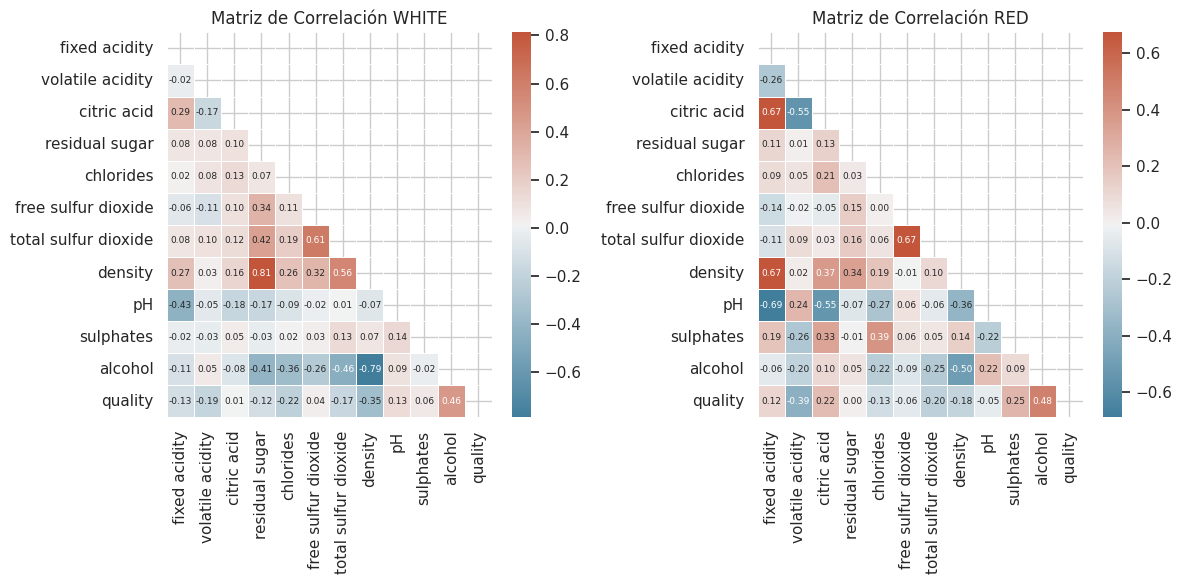

In [ ]:
df_corr = df

# Separo los datos por tipo de vino
dfWhite = df_corr[df_corr['type'] == 'white']
dfWhite = dfWhite.drop(['type'], axis=1)
dfRed = df_corr[df_corr['type'] == 'red']
dfRed = dfRed.drop(['type'], axis=1)

# Genero las matrices de correlación
dfWhiteCorr = dfWhite.corr()
dfRedCorr = dfRed.corr()

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))                  # Define el lienzo de la visualización
cmap = sns.diverging_palette(230, 20, as_cmap=True)                 # Define el mapa de colores

# Genero los mapas de calor por tipo de vino
# WHITE
mask = np.triu(np.ones_like(dfWhiteCorr, dtype=bool))               # Máscara para la parte superior del mapa de calor
sns.heatmap(dfWhiteCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax1)
ax1.set_title('Matriz de Correlación WHITE')
# RED
mask = np.triu(np.ones_like(dfRedCorr, dtype=bool))                 # Máscara para la parte superior del mapa de calor
sns.heatmap(dfRedCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax2)
ax2.set_title('Matriz de Correlación RED')

plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
plt.show()


Text(0.5, 1.0, 'Matriz de Correlación WHITE')

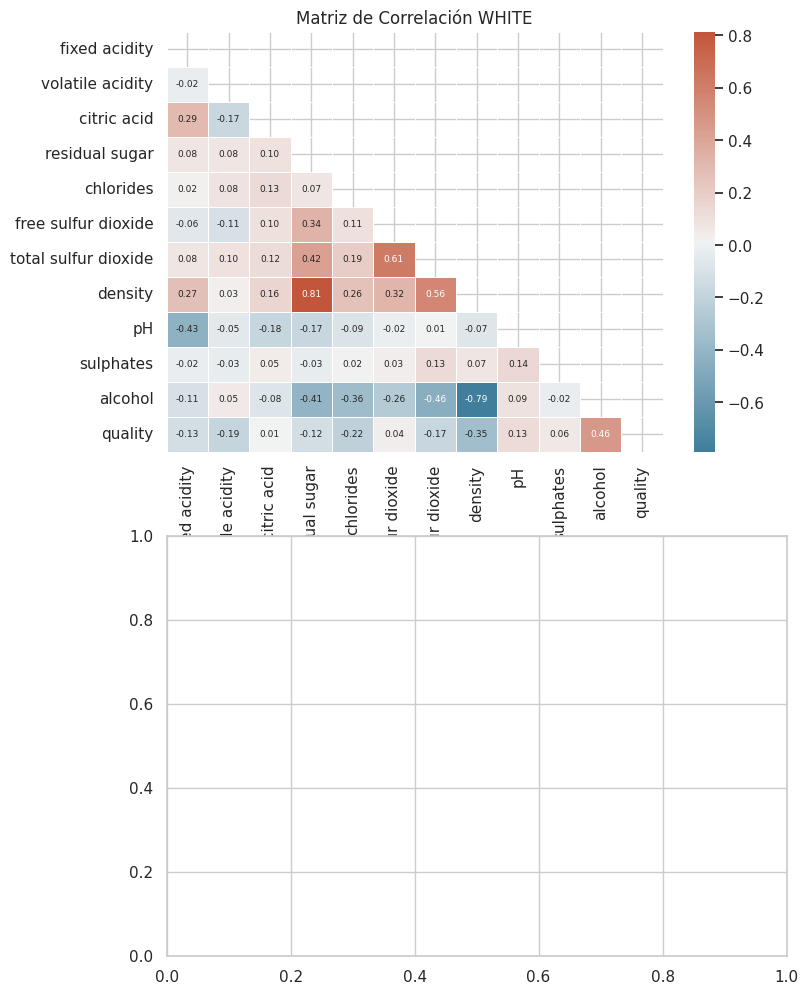

In [ ]:
f, (ax1,ax2) = plt.subplots(2, 1, figsize=(8, 12))                  # Define el lienzo de la visualización
cmap = sns.diverging_palette(230, 20, as_cmap=True)                 # Define el mapa de colores

mask = np.triu(np.ones_like(dfWhiteCorr, dtype=bool))               # Máscara para la parte superior del mapa de calor
sns.heatmap(dfWhiteCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax1)
ax1.set_title('Matriz de Correlación WHITE')


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


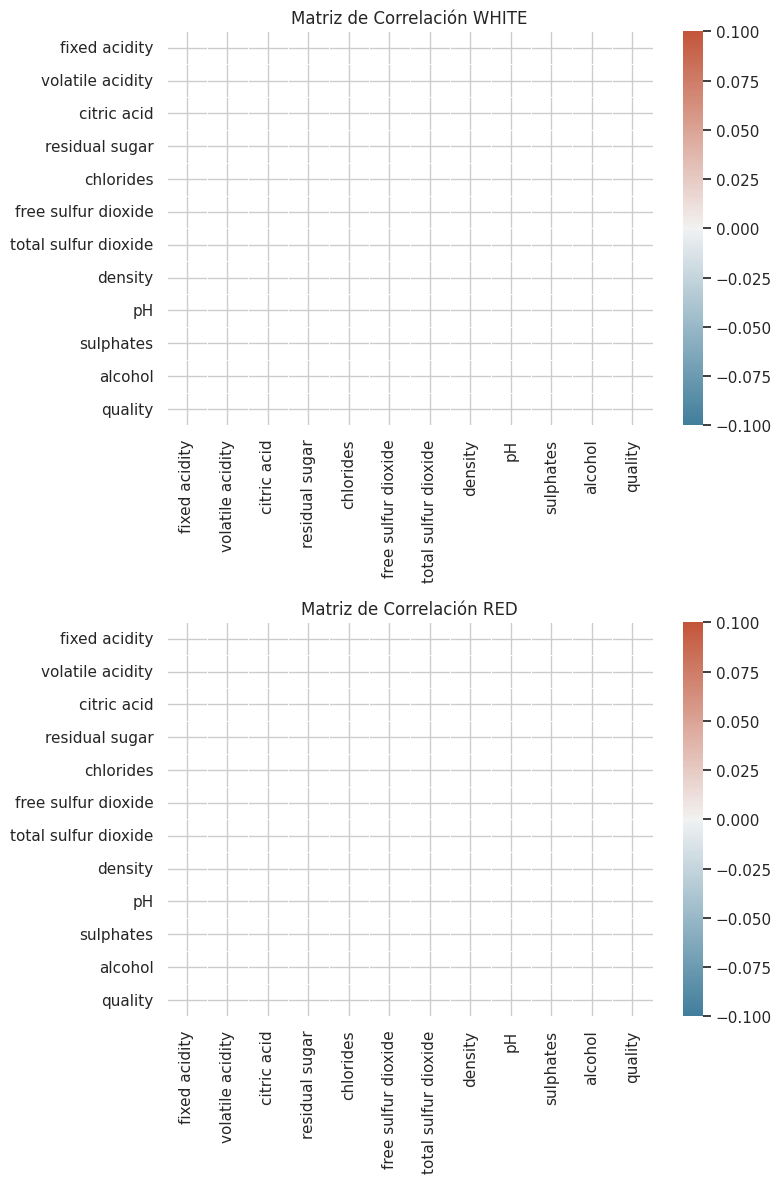

In [ ]:
# Elimino las columnas que no deseo correlacionar (o son categóricas) del DataFrame a correlacionar
#df_corr = df.drop(['gama', 'gamaNro'], axis=1)
df_corr = df.copy()

# Separo los datos por tipo de vino
dfWhite = df_corr[df_corr['type'] == 1]
dfWhite = dfWhite.drop(['type'], axis=1)
dfRed = df_corr[df_corr['type'] == 0]
dfRed = dfRed.drop(['type'], axis=1)

# Genero las matrices de correlación
dfWhiteCorr = dfWhite.corr()
dfRedCorr = dfRed.corr()

# f, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))                  # Define el lienzo de la visualización
f, (ax1,ax2) = plt.subplots(2, 1, figsize=(8, 12))                  # Define el lienzo de la visualización
cmap = sns.diverging_palette(230, 20, as_cmap=True)                 # Define el mapa de colores

# Genero los mapas de calor por tipo de vino
# WHITE
mask = np.triu(np.ones_like(dfWhiteCorr, dtype=bool))               # Máscara para la parte superior del mapa de calor
sns.heatmap(dfWhiteCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax1)
ax1.set_title('Matriz de Correlación WHITE')
# RED
mask = np.triu(np.ones_like(dfRedCorr, dtype=bool))                 # Máscara para la parte superior del mapa de calor
sns.heatmap(dfRedCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax2)
ax2.set_title('Matriz de Correlación RED')

plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
plt.show()

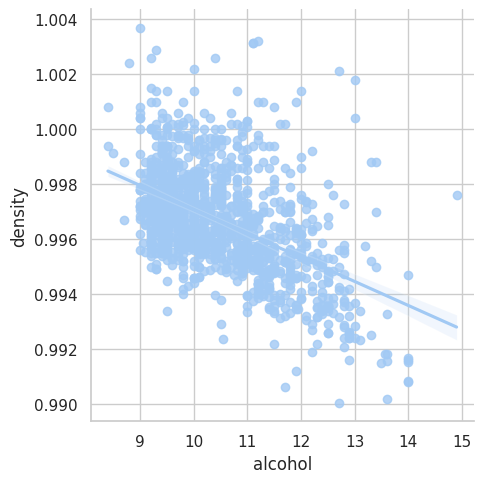

In [ ]:
# Se puede ver en detalle la correlación entre el alcohol y la densidad de los vinos blancos.

lmplot(x='alcohol', y='density', data=df_red, fit_reg=True)

💡 INSIGHTS

Se observa mayor correlación positiva entre las siguientes variables:
* "free sulfur dioxide" y "total sulfur dioxide": Esto es así ya que el dióxido de azufre total incluye tanto el libre como el combinado
* "density" y "residual sugar" en vinos blancos: Esto es así dado que la densidad del vino tiende a aumentar con el contenido de azúcar residual, ya que el azúcar contribuye al peso del líquido.

Del mismo modo, hay una mayor correlación negativa entre:
* "pH" y "Fixed Acidity": ya que un mayor contenido de acidez fija generalmente resulta en un pH más bajo.
* "alcohol" y "density": ya que a mayores concentraciones de alcohol se aligera la densidad del vino.

Por su parte, llaman la atención:
* La ausencia de una marcada correlación entre "Sulphates" y "Alcohol" ya que los sulfitos se utilizan para estabilizar el vino y prevenir la oxidación, lo cual es importante en vinos con mayor contenido de alcohol.

### **◼️ ANÁLISIS MULTIVARIADO**
----

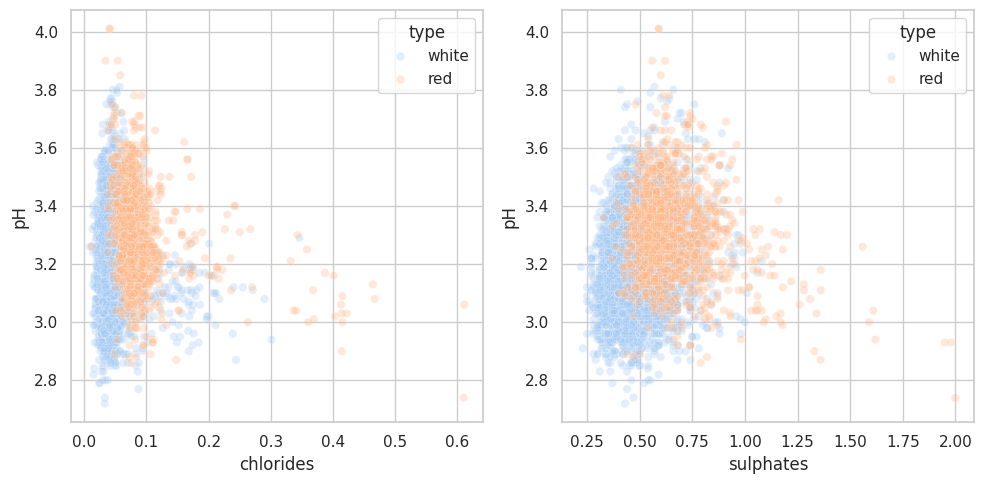

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[5, 5]))
#sns.scatterplot(data=df, x="chlorides", y="pH", hue=df['type'].map(type_label), alpha=0.3, ax=axs[0])
sns.scatterplot(data=df, x="chlorides", y="pH", hue=df['type'], alpha=0.3, ax=axs[0])
#sns.scatterplot(data=df, x="sulphates", y="pH", hue=df['type'].map(type_label), alpha=0.3, ax=axs[1])
sns.scatterplot(data=df, x="sulphates", y="pH", hue=df['type'], alpha=0.3, ax=axs[1])
f.tight_layout()

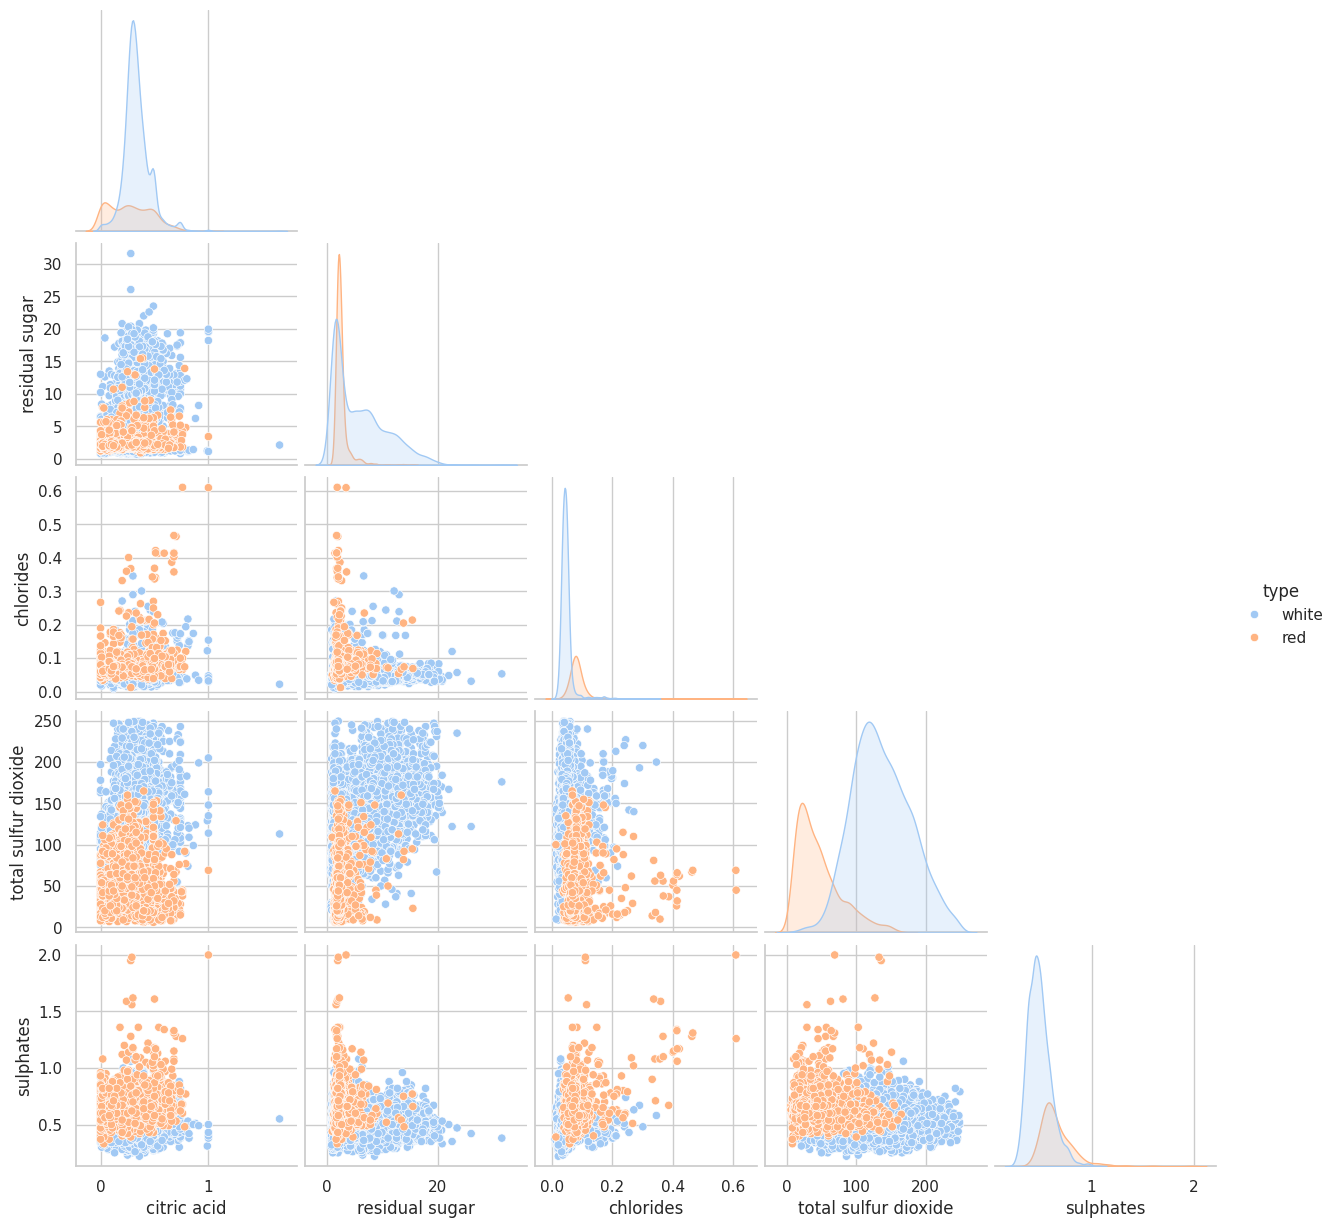

In [ ]:
# Se utiliza un pairplot para graficar relaciones por pares.
sns.pairplot(df, vars=df[['citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates']], hue='type', corner=True, palette=custom_palette)


#### **◾ ANÁLISIS DE MULTICOLINEALIDAD**

La multicolinealidad ocurre cuando dos o más variables en un modelo están altamente correlacionadas entre sí (es decir, no brindan información única o independiente), lo que puede afectar la interpretación y el rendimiento del modelo. Por lo tanto, eliminar variables redundantes puede mejorar la eficiencia y el rendimiento del modelo.
Una forma de detectar la multicolinealidad es mediante el uso de una métrica conocida como **factor de inflación de la varianza (VIF)** , que mide la correlación y la fuerza de la correlación entre las variables.

In [ ]:
# Defino la función para el cálculo de VIF

def variance_inflation_factors(ext_df):
    '''
        Parameter: ext_df >> design matrix with all explanatory variables.
        Returns vif >> Series, variance inflation factors
    '''
    ext_df = add_constant(ext_df)
    vifs = pd.Series(
        [1 / (1. - OLS(ext_df[col].values,
                       ext_df.loc[:, ext_df.columns != col].values).fit().rsquared)
         for col in ext_df],
        index=ext_df.columns,
        name='VIF'
    )
    return vifs

In [ ]:
# Se calcula el VIF para todas las variables del dataset

df_Multicol = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']]

df_Multicol=df_Multicol.astype(float)

variance_inflation_factors(df_Multicol)

,VIF
const,1.866615e+06
fixed acidity,5.323758e+00
volatile acidity,2.044247e+00
citric acid,1.652889e+00
residual sugar,6.529550e+00
chlorides,1.640679e+00
free sulfur dioxide,2.214334e+00
total sulfur dioxide,3.007988e+00
density,1.633426e+01
pH,2.591053e+00


El valor de VIF comienza en 1 y no tiene límite superior. Como regla general se interpreta el VIF de la siguiente manera:

* **VIF = 1:** no hay colinealidad entre la variable predictora y las demás variables. Esto significa que la variable no está correlacionada con ninguna otra variable en el modelo.

* **1 < VIF < 5:** generalmente se considera aceptable y sugiere una colinealidad leve o moderada entre la variable predictora y otras variables. No es motivo de preocupación, pero se debe tener en cuenta al interpretar los coeficientes del modelo.

* **VIF > 5:** indica una colinealidad sustancial entre la variable predictora y al menos una de las otras variables. Esto puede sugerir que la variable está  muy correlacionada con otras variables y puede dificultar la interpretación de los coeficientes del modelo.

En casos donde el VIF es extremadamente alto (por ejemplo, superior a 10 o 20), se considera que la colinealidad es muy fuerte. Esto indica que la variable está altamente correlacionada con otras variables y puede afectar significativamente las estimaciones de los coeficientes de regresión.

In [ ]:
# Remuevo algunas variables fuermentente correlacionadas

#df_Multicol = df.drop(columns=['residual sugar'])

df_Multicol = df[['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']]

df_Multicol=df_Multicol.astype(float)
variance_inflation_factors(df_Multicol)

,VIF
const,430169.683876
fixed acidity,2.528929
volatile acidity,1.910169
citric acid,1.651684
chlorides,1.564102
free sulfur dioxide,2.212990
total sulfur dioxide,2.771424
density,3.697360
pH,1.515218
sulphates,1.407848


<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>6 - FEATURE ENGINEERING </b></div>

### **◼️ FEATURE CREATION** - *Creación de Variables*

Se crean nuevas variables a partir de las existentes a fin de aportar mayor información al modelo de Machine Learning objetivo ayudando a capturar relaciones más complejas entre las características del vino y mejorar su rendimiento.

1. Relaciones entre Ácidos: Se sumar la acidez fija y la acidez volátil para obtener una medida de la acidez total. $$ \text{Total Acidity} = \text{Fixed Acidity} + \text{Volatile Acidity} $$

In [ ]:
df['total acidity'] = df['fixed acidity'] + df['volatile acidity']

2. Proporciones de Azufre: Se calcula la proporción de dióxido de azufre libre respecto al total. $$ \text{Prop Sulful} = \frac{\text{Free Sulfur Dioxide}}{\text{Total Sulfur Dioxide}} $$

In [ ]:
df['prop sulful'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

3. Densidad Ajustada ('ajust density'): Se ajusta la densidad del vino teniendo en cuenta el contenido de alcohol. $$ \text{ajust density} = \frac{\text{Density}}{\text{Alcohol}} $$

In [ ]:
df['ajust density'] = df['density'] / df['alcohol']

4. Índice de Dulzura: Se calcula la proporción de azúcar residual respecto a la acidez total. $$ \text{sweetness} = \frac{\text{Residual Sugar}}{\text{Total Acidity}} $$

In [ ]:
df['sweetness'] = df['residual sugar'] / df['total acidity']

5. Índice de Sulfitos: Se calcula la proporción de sulfatos respecto a los cloruros. $$ \text{sulphate index} = \frac{\text{Sulphates}}{\text{Chlorides}} $$

In [ ]:
df['sulphate index'] = df['sulphates'] / df['chlorides']

6. Índice de Acidez: Se ajustar la acidez fija por el pH para obtener una medida más precisa de la acidez percibida. $$ \text{acidity index} = \frac{\text{Fixed Acidity}}{\text{pH}} $$

In [ ]:
df['acidity index'] = df['fixed acidity'] / df['pH']

In [ ]:
# Analizo la Multicolinealidad de las nuevas variables

df_Multicol = df[['total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index', 'acidity index', 'quality']]

df_Multicol=df_Multicol.astype(float)
variance_inflation_factors(df_Multicol)

,VIF
const,320.283390
total acidity,15.023966
prop sulful,1.124938
ajust density,1.639521
sweetness,1.330560
sulphate index,1.334869
acidity index,13.941057
quality,1.359291


Existe una fuerte relación entre las variables 'total acidity' y 'acidity index'. Esto se debe a que las mismas se basan en el 'fixed acisity'. Para evitar tener dos variables fuertemente correlacionadas, remuevo una de ellas. En este caso será la variable 'acidity index', y agrego las variables originales no involucradas en la generación de las nuevas variables.

In [ ]:
df_Multicol = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index', 'quality']]

df_Multicol=df_Multicol.astype(float)
variance_inflation_factors(df_Multicol)

,VIF
const,919.134710
citric acid,1.260802
pH,1.259848
total acidity,1.408806
prop sulful,1.132856
ajust density,1.639127
sweetness,1.346646
sulphate index,1.321058
quality,1.374785


De esta manera se reducen a 7 las variables independientes para la clasificación de la calidad ('quality') de los vinos

### **◼️ FEATURE BINNING** - *Agrupación de Características*

La Ingeniería de Catacterísticas (***Feature Engineering***) implica transformar datos sin procesar en características que mejoren el rendimiento de los modelos de machine learning.

El ***Feature Binning*** es una técnica de Ingeniería de Catacterísticas que agrupa valores numéricos en intervalos o "bins". Esto puede convertir datos numéricos en categóricos, facilitando la detección de patrones y la reducción de ruido en los datos

In [ ]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
# Analizo la distribucion de los vinos por tipo y calidad.

#df.pivot_table(df, index=['type'], aggfunc='mean').round(2)

#pivot_df = df.pivot_table(index=['type','quality'], aggfunc='size')
pivot_df = df.pivot_table(index='type',columns='quality', aggfunc='size')
#pivot_df = df.pivot_table(index=df['type'].map(type_label),columns='quality', aggfunc='size')

#pivot_df = df.pivot_table(index=['type', 'quality'], aggfunc='size').reset_index(name='count')

print(pivot_df)

quality     3      4       5       6      7      8    9
type                                                   
red      10.0   53.0   577.0   535.0  165.0   17.0  NaN
white    17.0  151.0  1163.0  1779.0  688.0  130.0  5.0


In [ ]:
# Otra forma de agrupar los datos

df.groupby(['type', 'quality']).size().reset_index(name='counts')
#df.groupby([df['type'].map(type_label), 'quality']).size().reset_index(name='counts')


,type,quality,counts
0,red,3,10
1,red,4,53
2,red,5,577
3,red,6,535
4,red,7,165
5,red,8,17
6,white,3,17
7,white,4,151
8,white,5,1163
9,white,6,1779


Se recategorizan los vinos en gama Baja, Media y Alta en función de la calidad de los mismos (discretización).

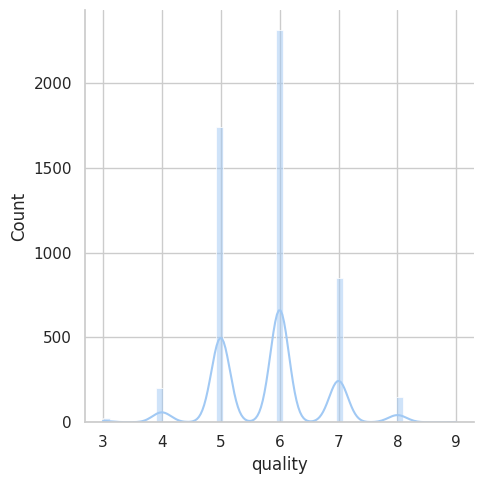

In [ ]:
# Analizo la distribución de las calidades de los vinos

from seaborn import displot
displot(df.quality, kind='hist', kde=True)

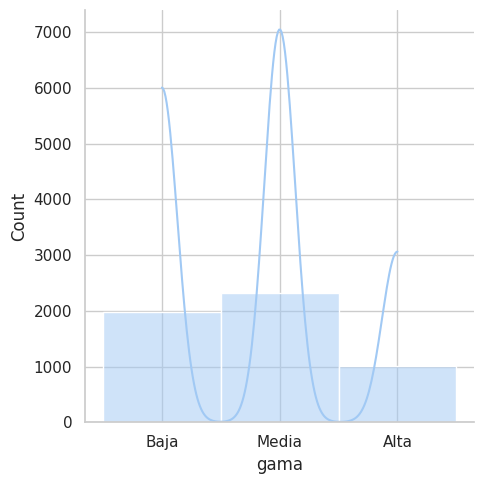

In [ ]:
#df['gama'] = df['quality'].apply(lambda x: 'Baja' if x <= 4 else ('Media' if x <= 5 else ('Alta' if x <= 7 else 'Superior')))
#df['gama'] = df.quality.apply(lambda x: 'Baja' if x <= 4 else ('Media' if x <= 5 else ('Alta' if x <= 7 else 'Superior')))

#rangos = ["Baja", "Media", "Alta", "Superior"]
#df['gama'] = pd.cut(df['quality'], bins=[0, 4, 5, 7, 10], labels=rangos)

rangos = ["Baja", "Media", "Alta"]
df['gama'] = pd.cut(df['quality'], bins=[0, 5, 6, 10], labels=rangos)

#df.head()
displot(df.gama, kind='hist', kde=True)

Totalizo por tipo y gama de vinos

In [ ]:
pd.pivot_table(df, index='type', columns='gama', values='quality', aggfunc='count', margins=True, margins_name="TOTAL", observed=False)
#df.pivot_table(index='type', columns='gama', aggfunc='size')

# 0: 'red', 1: 'white'

gama,Baja,Media,Alta,TOTAL
type,,,,
red,640,535,182,1357
white,1331,1779,823,3933
TOTAL,1971,2314,1005,5290


In [ ]:
pivot_table = df.pivot_table(index='quality', columns='gama', aggfunc='size', fill_value=0, observed=False)
pivot_table

gama,Baja,Media,Alta
quality,,,
3,27,0,0
4,204,0,0
5,1740,0,0
6,0,2314,0
7,0,0,853
8,0,0,147
9,0,0,5


Se convierten las variables categóricas en valores numéricos para su posterior uso con los algoritmos de Machine Learning.

In [ ]:
# Label encoding

diccionario = {'Baja':1, 'Media':2, 'Alta':3, 'Superior':4}
df['gamaNro'] = df['gama'].map(diccionario)
pd.pivot_table(df, index='type', columns='gamaNro', values='quality', aggfunc='count', margins=True, margins_name="TOTAL", observed=False)

gamaNro,1,2,3,TOTAL
type,,,,
red,640,535,182,1357
white,1331,1779,823,3933
TOTAL,1971,2314,1005,5290


In [ ]:
df[["type", "gama", "gamaNro"]].dtypes

,0
type,object
gama,category
gamaNro,category


In [ ]:
df.describe(include='category')

,gama,gamaNro
count,5290,5290
unique,3,3
top,Media,2
freq,2314,2314


In [ ]:
# Instancio el Laber Encoder para la transformación de datos categóricos a valores numéricos

le = LabelEncoder()
#df['type'] = le.fit_transform(df['type']).astype(int)
df['gamaNro'] = le.fit_transform(df['gamaNro']).astype(int)
#df[["type", "gama", "gamaNro"]].dtypes
df.info()

# diccionario = {"white":1,"red":0}
#df['type'] = df['type'].map(diccionario)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5290 non-null   object  
 1   fixed acidity         5290 non-null   float64 
 2   volatile acidity      5290 non-null   float64 
 3   citric acid           5290 non-null   float64 
 4   residual sugar        5290 non-null   float64 
 5   chlorides             5290 non-null   float64 
 6   free sulfur dioxide   5290 non-null   float64 
 7   total sulfur dioxide  5290 non-null   float64 
 8   density               5290 non-null   float64 
 9   pH                    5290 non-null   float64 
 10  sulphates             5290 non-null   float64 
 11  alcohol               5290 non-null   float64 
 12  quality               5290 non-null   int64   
 13  total acidity         5290 non-null   float64 
 14  prop sulful           5290 non-null   float64 
 15  ajus

In [ ]:
df["type"].value_counts() # 0: Red / 1: White

,count
type,
white,3933
red,1357


In [ ]:
# guardo los nombres de cada tipo a los fines de utilizarlos en las visualizaciones
#type_label = {0: 'red', 1: 'white'}

### **◼️ ESCALADO** - *Estandarización de los datos*
----

El ***Escalado*** es una parte importante de la Ingeniería de Características (Feature Engineering). Se trata de una técnica que ajusta los valores de las variables para que estén dentro de un rango específico. Esto es crucial en modelos de machine learning ya que muchos algoritmos de machine learning son sensibles a las diferencias de escala entre las variables, pudiendo afectar negativamente el rendimiento del modelo.

Debido a que el dataset con el que se está trabajando tiene valores extremos que no serán eliminados, utilizaremos el método ***Robust Scaling*** que utiliza la mediana y el rango intercuartílico (IQR) en lugar de la media y la desviación estándar, lo que lo hace más robusto a los outliers:

$$ X_{scaled} = \frac{X_i - X_{med}}{X_{q75} - X_{q25}}$$

In [ ]:
rs = RobustScaler()
df[['fixed acidity_RS', 'volatile acidity_RS', 'citric acid_RS', 'residual sugar_RS', 'chlorides_RS', 'free sulfur dioxide_RS', 'total sulfur dioxide_RS', 'density_RS', 'pH_RS', 'sulphates_RS', 'alcohol_RS']] = rs.fit_transform(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
df[['fixed acidity_RS', 'volatile acidity_RS', 'citric acid_RS', 'residual sugar_RS', 'chlorides_RS', 'free sulfur dioxide_RS', 'total sulfur dioxide_RS', 'density_RS', 'pH_RS', 'sulphates_RS', 'alcohol_RS']].describe().round(3)

,fixed acidity_RS,volatile acidity_RS,citric acid_RS,residual sugar_RS,chlorides_RS,free sulfur dioxide_RS,total sulfur dioxide_RS,density_RS,pH_RS,sulphates_RS,alcohol_RS
count,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000
mean,0.167,0.245,0.051,0.408,0.348,0.075,-0.033,-0.026,0.070,0.138,0.079
std,1.016,0.935,0.914,0.775,1.320,0.690,0.706,0.635,0.761,0.882,0.624
min,-2.462,-1.222,-1.937,-0.368,-1.357,-1.080,-1.392,-1.648,-2.333,-1.706,-1.263
25%,-0.462,-0.389,-0.437,-0.158,-0.321,-0.480,-0.532,-0.534,-0.429,-0.471,-0.474
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.538,0.611,0.562,0.842,0.679,0.520,0.468,0.466,0.571,0.529,0.526
max,6.846,7.111,8.437,5.070,20.143,4.000,1.690,3.427,3.810,8.765,2.368


<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>7 - MODELADO </b></div>

Se consideran las siguientes variables independientes para la clasificación de la calidad ('quality') de los vinos:
* citric acid
* pH
* total acidity
* prop sulful
* ajust density
* sweetness
* sulphate index

In [ ]:
# Se seleccionan las características a considerar

features = ['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']

### **◼️ ALGORITMO 1: Regresión Logística Multinomial**
----

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
# X = df.drop(['quality'],axis=1)  # Para seleccionar todas las categorías (a excepción de quality)
X = df[features]  # Variables independientes (predictoras)
y = df['gama']    # Variable objetivo (categórica)

# Aseguro que la variable objetivo sea categórica
#y = y.astype('gama')
y.dtype

CategoricalDtype(categories=['Baja', 'Media', 'Alta'], ordered=True, categories_dtype=object)

In [ ]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea y entrena el modelo de regresión logística multinomial
model_RLM = LogisticRegression(solver='lbfgs', max_iter=1000) # por defecto multi_class='multinomial'
model_RLM.fit(X_train, y_train)

# Se utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba
y_pred = model_RLM.predict(X_test)

# Se evalua el rendimiento del modelo
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nMatrix de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.516698172652804

Matrix de Confusión:
 [[ 24  27 250]
 [  4 334 265]
 [ 23 198 462]]

Informe de Clasificación:
               precision    recall  f1-score   support

        Alta       0.47      0.08      0.14       301
        Baja       0.60      0.55      0.57       603
       Media       0.47      0.68      0.56       683

    accuracy                           0.52      1587
   macro avg       0.51      0.44      0.42      1587
weighted avg       0.52      0.52      0.48      1587



**VALIDACIÓN CRUZADA**

https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gamaNro']

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Se crea el pipeline

modelo = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de los datos
    ('features', LogisticRegression(solver='lbfgs', max_iter=200))  # Modelo de Regresión Logística Multinomial (por defecto multi_class='multinomial')
])


# Se realiza la Validación Cruzada y evalúa el rendimiento del modelo

scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')

print("Accuracy scores for each fold: ", scores)
print("Mean accuracy: ", scores.mean())
print("Standard deviation: ", scores.std())



Accuracy scores for each fold:  [0.51039698 0.57277883 0.53780718 0.6020794  0.51890359]
Mean accuracy:  0.5483931947069942
Standard deviation:  0.034357765420389555


In [ ]:
hiperparametros = {'features__C': [0.01, 0.1, 1, 10, 100]}  # Diferentes valores de C para probar

grilla=GridSearchCV(modelo, hiperparametros, cv=5,scoring='accuracy')
grilla.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('features',
                                        LogisticRegression(max_iter=200))]),
             param_grid={'features__C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
print(grilla.best_params_)

{'features__C': 0.01}


In [ ]:
grilla.cv_results_

{'mean_fit_time': array([0.01257176, 0.01224432, 0.01282945, 0.01245461, 0.01230936]),
 'std_fit_time': array([0.00162816, 0.00031735, 0.00053194, 0.00013082, 0.00028854]),
 'mean_score_time': array([0.00382214, 0.00337849, 0.00323977, 0.00318661, 0.00309334]),
 'std_score_time': array([8.03701008e-04, 2.44488161e-04, 1.10033375e-04, 9.18034260e-05,
        5.42280634e-05]),
 'param_features__C': masked_array(data=[0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'features__C': 0.01},
  {'features__C': 0.1},
  {'features__C': 1},
  {'features__C': 10},
  {'features__C': 100}],
 'split0_test_score': array([0.55060729, 0.54520918, 0.54520918, 0.54520918, 0.54385965]),
 'split1_test_score': array([0.54116059, 0.54251012, 0.53846154, 0.53981107, 0.53981107]),
 'split2_test_score': array([0.58434548, 0.57624831, 0.57219973, 0.57219973, 0.57219973]),
 'split3_test_score': array([0.55810811, 0.56351351, 0.56486486, 0

In [ ]:
# entrenamos con el mejor modelo
model_RLM=grilla.best_estimator_
model_RLM.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features', LogisticRegression(C=0.01, max_iter=200))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_test = model_RLM.predict(X_test)
y_pred_train = model_RLM.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_RLM = mean_squared_error(y_train,y_pred_train, squared=False) #Si utilizan squared=True en la función mean_squared_error, obtendrán el MSE
#score_test_model_RLM = mean_squared_error(y_test,y_pred_test, squared=False)

score_train_model_RLM = mean_squared_error(y_train,y_pred_train)
score_test_model_RLM = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_RLM))  # Calculo la raiz del MSE dado que no me permite usar el parámetro  squared=True en la función mean_squared_error
print ("Testeo:", np.sqrt(score_test_model_RLM))

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 0.5911039858107141
Testeo: 0.6077816536113969


El RMSE tiene la misma unidad de medida que la variable objetivo del problema por lo que resulta comparable con el rango de los valores reales.
Cuanto menor sea el valor del RMSE, más precisas serán las predicciones del modelo en relación con los valores reales.

**IMPORTANCIA DE LAS CARACTERÍSTICAS**

La importancia de la permutación es un método para calcular la importancia de las características en el que los valores de cada característica evalúan uno a uno midiendo la disminución resultante en el rendimiento del modelo. Una característica con una alta puntuación de importancia de permutación es aquella que, cuando se baraja, hace que el rendimiento del modelo disminuya significativamente. Esto indica que la característica es importante para las predicciones del modelo.

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_RLM, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
for i, importancia in enumerate(X.columns):
    print(f"Importancia de {importancia}: {importancias[i]:.4f}")

Importancia de citric acid: 0.0115
Importancia de pH: 0.0007
Importancia de total acidity: 0.0064
Importancia de prop sulful: 0.0175
Importancia de ajust density: 0.1555
Importancia de sweetness: 0.0056
Importancia de sulphate index: 0.0223


### **◼️ ALGORITMO 2: Support Vector Machine (SVM)**
----

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gama'].cat.codes  # Convertir las etiquetas a códigos numéricos

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea y entrena el modelo de SVM para clasificación ordinal
model_SVM = make_pipeline(StandardScaler(), SVC(kernel='linear'))
model_SVM.fit(X_train, y_train)

# Se utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba
y_pred = model_SVM.predict(X_test)

# Se evalua el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrix de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.5431632010081916

Matrix de Confusión:
 [[406 197   0]
 [227 456   0]
 [ 26 275   0]]

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       603
           1       0.49      0.67      0.57       683
           2       1.00      0.00      0.00       301

    accuracy                           0.54      1587
   macro avg       0.70      0.45      0.40      1587
weighted avg       0.64      0.54      0.49      1587



**VALIDACIÓN CRUZADA**

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gamaNro']

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Se crea el pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de los datos
    ('modelo', SVC())
])

hiperparametros=[{'modelo__C':[1,10],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,10],'modelo__kernel':['rbf']}]
#hiperparametros=[{'modelo__C':[10],'modelo__kernel':['linear']},{'modelo__gamma':[0.01], 'modelo__C':[1],'modelo__kernel':['rbf']}]
grilla=GridSearchCV(pipeline,hiperparametros, cv=3,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('modelo', SVC())]),
             n_jobs=-1,
             param_grid=[{'modelo__C': [1, 10], 'modelo__kernel': ['linear']},
                         {'modelo__C': [1, 10], 'modelo__gamma': [0.01, 0.1],
                          'modelo__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
print(grilla.best_params_)

{'modelo__C': 1, 'modelo__gamma': 0.1, 'modelo__kernel': 'rbf'}


In [ ]:
grilla.cv_results_

{'mean_fit_time': array([0.41492248, 1.47936535, 0.66435297, 0.45831156, 0.41654007,
        0.53281267]),
 'std_fit_time': array([0.00508248, 0.34750031, 0.04083212, 0.07217774, 0.01149554,
        0.01521373]),
 'mean_score_time': array([0.11938039, 0.17633454, 0.5204893 , 0.30243961, 0.29845778,
        0.22785091]),
 'std_score_time': array([0.00141873, 0.04809395, 0.05715726, 0.00769769, 0.00792829,
        0.06546614]),
 'param_modelo__C': masked_array(data=[1, 10, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_modelo__kernel': masked_array(data=['linear', 'linear', 'rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_modelo__gamma': masked_array(data=[--, --, 0.01, 0.1, 0.01, 0.1],
              mask=[ True,  True, False, False, False, False],
        fill_value=1e+20),
 'params': [{'modelo__C': 1, 'modelo__kernel':

In [ ]:
# Se entrena con el mejor modelo
model_SVM=grilla.best_estimator_
model_SVM.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('modelo', SVC(C=1, gamma=0.1))])

In [ ]:
# Se hacen las predicciones con x_test, x_train
y_pred_test = model_SVM.predict(X_test)
y_pred_train = model_SVM.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_SVM = mean_squared_error(y_train,y_pred_train, squared=False)
#score_test_model_SVM = mean_squared_error(y_test,y_pred_test, squared=False)

score_train_model_SVM = mean_squared_error(y_train,y_pred_train)
score_test_model_SVM = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_SVM))
print ("Testeo:", np.sqrt(score_test_model_SVM))

#Si se utiliza squared=True en la función mean_squared_error, se obtiene el MSE

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 0.5911039858107141
Testeo: 0.6077816536113969


**IMPORTANCIA DE LAS CARACTERÍSTICAS**

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_SVM, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
for i, importancia in enumerate(X.columns):
    print(f"Importancia de {importancia}: {importancias[i]:.4f}")

Importancia de citric acid: 0.0356
Importancia de pH: 0.0216
Importancia de total acidity: 0.0133
Importancia de prop sulful: 0.0368
Importancia de ajust density: 0.1515
Importancia de sweetness: 0.0192
Importancia de sulphate index: 0.0346


### **◼️ ALGORITMO 3: Regresión Logística Ordinal**
----

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gama'].cat.codes  # Convertir las etiquetas a códigos numéricos

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea y entrena el modelo de Regresión Logística Ordinal
model_RLO = OrderedModel(y_train, X_train, distr='logit')
result = model_RLO.fit(method='bfgs')

# Se utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba
y_pred = result.predict(X_test).idxmax(axis=1)

# Se evalua el rendimiento del modelo
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nMatrix de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.878506
         Iterations: 68
         Function evaluations: 70
         Gradient evaluations: 70

Accuracy: 0.573408947700063

Matrix de Confusión:
 [[384 216   3]
 [202 437  44]
 [ 20 192  89]]

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64       603
           1       0.52      0.64      0.57       683
           2       0.65      0.30      0.41       301

    accuracy                           0.57      1587
   macro avg       0.60      0.52      0.54      1587
weighted avg       0.59      0.57      0.56      1587



Si bien es posible utilizar la clase OrdinalLogisticRegression de la biblioteca statsmodels para validar una Regresión Logística Ordinal, statsmodels no tiene una implementación directa para GridSearchCV, por lo que se necesitaría una solución personalizada que no será desarrollada en esta oportunidad.

### **◼️ ALGORITMO 4: Random Forest**
----

In [ ]:
model_RF = RandomForestRegressor()
hiperparametros={'max_depth':[3,5,7],'min_samples_leaf':[1], 'max_leaf_nodes':[8,10,12], 'n_estimators':[130,150,200]}
grilla=GridSearchCV(model_RF,hiperparametros,cv=3,scoring='neg_root_mean_squared_error', verbose=1)
grilla.fit(X_train,y_train)

#max_depth:         profundidad máxima permitida
#min_samples_leaf:  número mínimo de muestras requeridas en un nodo hoja del árbol.
#max_leaf_nodes:    limita el número máximo de nodos hoja que puede tener un árbol
#n_estimators:      indica la cantidad de árboles

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=130;, score=-0.615 total time=   1.7s
[CV 2/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=130;, score=-0.606 total time=   1.1s
[CV 3/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=130;, score=-0.618 total time=   1.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=150;, score=-0.615 total time=   1.2s
[CV 2/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=150;, score=-0.606 total time=   1.2s
[CV 3/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=150;, score=-0.617 total time=   1.1s
[CV 1/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=200;, score=-0.615 total time=   1.5s
[CV 2/3] END max_depth=3, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=200;, score=-0.606 total time=   2.1s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [8, 10, 12],
                         'min_samples_leaf': [1],
                         'n_estimators': [130, 150, 200]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
grilla.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 12,
 'min_samples_leaf': 1,
 'n_estimators': 130}

In [ ]:
grilla.best_score_

-0.6042295061106413

In [ ]:
# Se entrena con el mejor modelo

model_RF=grilla.best_estimator_
model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=12, n_estimators=130)

In [ ]:
# Se hacen las predicciones con x_test, x_train

y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_RF = mean_squared_error(y_train,y_pred_train, squared=False)
#score_test_model_RF = mean_squared_error(y_test,y_pred_test, squared=False)

score_train_model_RF = mean_squared_error(y_train,y_pred_train)
score_test_model_RF = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_RF))
print ("Testeo:", np.sqrt(score_test_model_RF))

#Si utilizan squared=True en la función mean_squared_error, obtendrán el MSE

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 0.5911039858107141
Testeo: 0.6077816536113969


**IMPORTANCIA DE LAS CARACTERÍSTICAS**

El modelo Random Forest en scikit-learn tiene el atributo feature_importances_. Este atributo proporciona la importancia de cada característica en la predicción del modelo.

In [ ]:
# Se calcula la importancia de las variables para el modelo

importancia_predictores = pd.DataFrame(
                            {'predictores': X.columns,
                             'importancia':  model_RF.feature_importances_
                            })

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictores,importancia
4,ajust density,0.780220
6,sulphate index,0.088169
3,prop sulful,0.069300
0,citric acid,0.024568
5,sweetness,0.023254
2,total acidity,0.007553
1,pH,0.006936


Se calcula la importancia de las características con otro método. Si bien los coeficientes varían, el orden de importancia se mantiene.

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_RF, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

for i, importancia in enumerate(X.columns):
    print(f"{importancia}: {importancias[i]:.4f}")

Importancia de los predictores en el modelo
-------------------------------------------
citric acid: 0.0054
pH: 0.0011
total acidity: 0.0015
prop sulful: 0.0175
ajust density: 0.1828
sweetness: 0.0046
sulphate index: 0.0244


### **◼️ ALGORITMO 5: K-Nearest Neighbor (KNN)**
----

In [ ]:
pipeline= Pipeline([('scaler', StandardScaler()),
                  ('modelo',KNeighborsRegressor())])

hiperparametros={'modelo__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}

grilla=GridSearchCV(pipeline,hiperparametros, cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('modelo', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'modelo__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 11]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
grilla.best_params_

{'modelo__n_neighbors': 11}

In [ ]:
grilla.best_score_

-0.6067222545075688

In [ ]:
# Se entrena con el mejor modelo
model_KNN=grilla.best_estimator_
model_KNN.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', KNeighborsRegressor(n_neighbors=11))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_test = model_KNN.predict(X_test)
y_pred_train = model_KNN.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_KNN = mean_squared_error(y_train,y_pred_train,squared=False)
#score_test_model_KNN = mean_squared_error(y_test,y_pred_test,squared=False)
score_train_model_KNN = mean_squared_error(y_train,y_pred_train)
score_test_model_KNN = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_KNN))  # Calculo la raiz del MSE dado que no me permite usar el parámetro  squared=True en la función mean_squared_error
print ("Testeo:", np.sqrt(score_test_model_KNN))

#Si utilizan squared=True en la función mean_squared_error, obtendrán el MSE

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 0.5515093691674176
Testeo: 0.5968204937723971


**IMPORTANCIA DE LAS CARACTERÍSTICAS**

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_KNN, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
for i, importancia in enumerate(X.columns):
    print(f"Importancia de {importancia}: {importancias[i]:.4f}")

Importancia de citric acid: 0.0478
Importancia de pH: 0.0363
Importancia de total acidity: 0.0292
Importancia de prop sulful: 0.0507
Importancia de ajust density: 0.1627
Importancia de sweetness: 0.0377
Importancia de sulphate index: 0.0478


<a id="1" href="#introduccion"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>🔲 CONCLUSIÓN </b></div>

El análisis del dataset de vinos revela varias características importantes.

* Se identificaron y eliminaron outliers, representando un pequeño porcentaje del total de datos.  
* Se evaluó la normalidad de las distribuciones de las variables numéricas utilizando histogramas, test de Shapiro-Wilk y QQ-plots. Si bien algunas variables mostraron cierta aproximación a la normalidad (ej: density y pH en vinos tintos), la mayoría no la cumplieron.
* Se detectaron y eliminaron outliers adicionales basados en el z-score para variables que se acercaban a la distribución normal.
* Finalmente, el análisis de correlación evidenció relaciones esperadas entre variables como el dióxido de azufre libre y total, y la densidad y el azúcar residual en vinos blancos, así como correlaciones negativas entre pH y acidez fija, y entre alcohol y densidad.  La ausencia de una correlación significativa entre sulfatos y alcohol es destacable.


<a id="1" href="#introduccion"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>🔲 REFERENCIAS </b></div>

* https://www.usc.gal/caa/MetAnalisisStgo1/enologia.pdf